# **Project Title : Taxi Trip Time Prediction**

Project Type - Regression

Contribution - Individual

**Project Summary**


With a global population exceeding 7 billion, the essential needs of sustenance—food, water, and shelter—are accompanied by the indispensable requirement of mobility. The rapid technological advancements of the past two decades have ushered in a more efficient mode of transportation through internet and app-based systems. New York City stands as a prime example of such progress, boasting an extensive network of subways, buses, and taxi services. The city hosts over 10,000 taxis, catering to a populace where nearly 50% lack personal vehicles. Consequently, taxis serve as the primary mode of transportation for most, facilitating over 100 million trips annually.

The primary aim is to develop a predictive model capable of estimating taxi trip durations. Such a model would streamline the process of matching appropriate cabs with customers, enhancing efficiency and expediency in the transportation system.

The following steps were followed in the project:

Data Preprocessing and cleaning: Done data preprocessing by converting some columns' datatypes , by adding some new columns and removimng outliers

Exploratory Data Analysis: Did Exploratory Analysis which includes Univariate as well as Bivariate Analysis.

Data Split: The preprocessed data was split into training and test sets on a random state of 0. By using training data we trained our predictive model and we used testing data to evaluate our prediction.

Model Training: The models were trained using the training data, and these models are optimized by some Hyperparameter settings.

Model Evaluation: The performance of the trained models was evaluated using metrics such as mean absolute error, root mean squared error, and R-squared. The model that performed the best on the test data was selected.

Model Deployment: The selected model was deployed in a live production setting . The model's performance was monitored over time to ensure its accuracy and usefulness.

Models Used For modeling we tried various regression models such as

1)Linear Regression

2)Random Forest

3)XG Boosting

All these models were fine tuned using a random search method with repeated cross-validation (CV) to ﬁnd the best hyperparameters. We also found out Feature importance so that we get to know about the features which are highly important.

Github link:

https://github.com/ady909/-Taxi-trip-time-Prediction/blob/128072d60553aa1ee147e3819584d24c04b2cdb9/Taxi_trip_time_Prediction_.ipynb

Our goal is to develop a predictive model that accurately estimates the duration of taxi trips in a metropolitan area. The model will take into account various factors such as pick-up and drop-off locations, time of day, day of the week, weather conditions, and traffic patterns.

The primary objectives and challenges include:

Trip Duration Prediction: Develop a model that can estimate the duration of a taxi trip with the highest possible accuracy.

Real-Time Predictions: Implement a system that provides real-time trip duration estimates for passengers and drivers, allowing for improved ride planning and experience.

Feature Engineering: Identify and extract relevant features from the dataset, such as geographical coordinates, time-related variables, and weather data.

Data Preprocessing: Clean and preprocess the data, including handling missing values, outliers, and ensuring data quality.

Model Selection: Explore different machine learning algorithms and techniques to identify the most suitable model for the task.

Hyperparameter Tuning: Optimize model hyperparameters to achieve the best performance.

Cross-Validation: Implement cross-validation strategies to ensure the model's ability to generalize to new data.

Evaluation Metrics: Define appropriate evaluation metrics to assess the model's accuracy, such as Mean Absolute Error (MAE) or Root Mean Square Error (RMSE).

Scalability: Ensure that the model can handle a high volume of prediction requests in real-time.

Deployment: Deploy the model in a production environment for use by taxi service providers, drivers, and passengers.

Continuous Monitoring: Establish a system for monitoring model performance and making necessary updates or retraining as data distribution or patterns change.

The successful development and deployment of this predictive model will lead to improved service quality, better resource allocation, and enhanced overall efficiency for both passengers and taxi service providers. It will also contribute to a more competitive and data-driven approach in the taxi and ride-sharing industry

**Problem Description**

Your assignment entails constructing a predictive model to estimate the total ride duration of taxi trips within New York City, utilizing a dataset provided by the NYC Taxi and Limousine Commission. This dataset comprises various attributes such as pickup time, geographical coordinates, number of passengers, and other pertinent variables.



**Business Objective**

To optimize trip duration prediction, enhance resource allocation, and improve overall efficiency, taxi companies can leverage historical trip duration data analysis. By scrutinizing this data, they can anticipate service demand fluctuations across different timeframes, aiding in strategic resource planning. Additionally, understanding trip durations enables the implementation of dynamic pricing strategies, allowing fares to be adjusted based on demand and route conditions. Moreover, analyzing trip durations facilitates the evaluation of driver performance, identification of areas for enhancement, and incentivization of efficient driving behaviors.

Through collaboration with local authorities, taxi companies can utilize trip duration data to assist in managing and alleviating traffic congestion in urban areas. This comprehensive analysis of trip duration data aims to address various operational challenges and enhance the overall efficiency and effectiveness of taxi services.








**Data Description**

The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

**Data fields**

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip trip_duration - duration of the trip in seconds

In [1]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import datetime

<ipython-input-1-79a3d05adb3b>:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [2]:
#some settings for visualizations
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [3]:
#Mounting the Drive inorder to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#creating dataframe
nyc_df = pd.read_csv("/content/drive/MyDrive/NYC Taxi Data.csv")

In [5]:
#lets look at first few elements
nyc_df.head(n =10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [6]:
#last few elements
nyc_df.tail(n = 10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458634,id3445276,1,2016-04-03 13:51:25,2016-04-03 14:07:37,2,-73.989075,40.730465,-73.963882,40.773739,N,972
1458635,id3027038,2,2016-05-19 14:46:55,2016-05-19 14:50:52,1,-73.985390,40.763020,-73.989708,40.767502,N,237
1458636,id0405770,2,2016-02-12 10:13:06,2016-02-12 10:26:26,1,-73.863815,40.769684,-73.864395,40.761326,N,800
1458637,id1920898,1,2016-04-17 18:48:16,2016-04-17 19:00:56,1,-73.975357,40.751705,-73.949478,40.776764,N,760
1458638,id1454193,2,2016-02-02 00:39:39,2016-02-02 00:46:33,5,-73.988823,40.736553,-73.989166,40.757393,N,414
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [7]:
#lets check dimensions
nyc_df.shape

(1458644, 11)

Looks like a huge data with 1458644 data points , 10 features and one Target variable i.e. 'trip_duration'

In [8]:
#basic summary
nyc_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


4 columns are object datatype ,4 columns are float datatype and remaing 3 columns are integer datatype.

In [9]:
#five point summary
nyc_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


**Data Pre-processing**

Converting the datatype of pickup date time and dropoff date time to datetime datatype

In [10]:
#convertin to datetime datatype
nyc_df['pickup_datetime']= pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime']= pd.to_datetime(nyc_df['dropoff_datetime'])

In [11]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


Extracting hour , day_name , day , month and creating new features

In [12]:
## Creating new features
#Extracting hour from pickup and dropoff datetime columns
nyc_df['pickup_hour']= nyc_df['pickup_datetime'].dt.hour
nyc_df['dropoff_hour']= nyc_df['dropoff_datetime'].dt.hour

#Extracting day from pickup and dropoff datetime columns
nyc_df['pickup_day']=nyc_df['pickup_datetime'].dt.day_name()
nyc_df['dropoff_day']=nyc_df['dropoff_datetime'].dt.day_name()

#Extracting date from pickup and dropoff datetime columns
nyc_df['pickup_date']=pd.DatetimeIndex(nyc_df['pickup_datetime']).day
nyc_df['dropoff_date']=pd.DatetimeIndex(nyc_df['dropoff_datetime']).day

#Extracting month from pickup and dropoff datetime columns
nyc_df['pickup_month']= nyc_df['pickup_datetime'].dt.month
nyc_df['dropoff_month']=nyc_df['dropoff_datetime'].dt.month

#Extracting weekday from pickup and dropoff datetime columns
nyc_df['pickup_weekday']=nyc_df['pickup_datetime'].dt.weekday
nyc_df['dropoff_weekday']=nyc_df['dropoff_datetime'].dt.weekday



*   pickup_day and dropoff_day which will contain the name of the day on which the ride was taken.

*   pickup_weekday and dropoff_weekday which will contain the day number instead of characters with Monday=0 and Sunday=6.

*   pickup_hour and dropoff_hour with an hour of the day in the 24-hour format.

*   pickup_date and dropoff_date will provide the date of the trip.

*   pickup_month and dropoff_month with month number with January=1 and December=12.













**time_zone as a New feature is created**

I have created a function that allows us to determine the time of day a ride was taken. This function categorizes the time into four zones: 'Morning' (from 6:00 am to 11:59 am), 'Afternoon' (from 12 noon to 3:59 pm), 'Evening' (from 4:00 pm to 9:59 pm), and 'Late Night' (from 10:00 pm to 5:59 am).

In [13]:
#custom function for calculating new feature
def time_zone(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [14]:
nyc_df['pickup_timezone']= nyc_df['pickup_hour'].apply(time_zone)
nyc_df['dropoff_timezone']= nyc_df['dropoff_hour'].apply(time_zone)

**Lets create distance as a new feature**

To calculate distances from geographical coordinates, we need to import a library designed for this purpose.

Importing the library which lets us calculate distance from geographical coordinates

In [15]:
#importing library
from geopy.distance import great_circle

In [16]:
#defining custom function to calculate distance
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):

 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)

 return great_circle(start_coordinates,stop_coordinates).km

In [17]:
#creatng new feature
nyc_df['distance'] = nyc_df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

**trip direction feature is created**

We've noticed that the direction of the trip, particularly for airport rides, can impact the trip duration. To account for this, we will calculate the bearing of each trip, indicating the general direction in which the taxi traveled from the pickup point to the dropoff point.

In this context, we use a convention where North corresponds to 0 degrees, East is 90 degrees, South is 180 degrees, and the full circle returns to North at 360 degrees.

In [18]:
#importing math module
import math

#creating custom function for trip direction
def get_bearing(lat1, long1, lat2, long2):
    dLon = (long2 - long1)
    x = math.cos(math.radians(lat2)) * math.sin(math.radians(dLon))
    y = math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) - math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(math.radians(dLon))
    brng = np.arctan2(x,y)
    brng = np.degrees(brng)
    if brng < 0:
      brng = 360 + brng
      return brng
    else:
      return brng

In [19]:
#creating feature
nyc_df['trip_direction'] = nyc_df.apply(lambda x: get_bearing(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],
                       x['dropoff_longitude']), axis = 1)

**trip_speed as a new feature**

In [20]:
#creating new features
nyc_df['time_diff_minutes']= nyc_df['dropoff_datetime']- nyc_df['pickup_datetime']
nyc_df['time_diff_minutes']= nyc_df['time_diff_minutes']/np.timedelta64(1,'m')

In [21]:
#The trip_speed unit will be mph
def speed(x,y):
  z = (x*0.621)/(y*0.016667)
  return z

In [22]:
#creating feature
nyc_df['trip_speed']= nyc_df.apply(lambda x: speed(x['distance'],x['time_diff_minutes']),axis=1)

**Lets first check our data now**

In [23]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,dropoff_month,pickup_weekday,dropoff_weekday,pickup_timezone,dropoff_timezone,distance,trip_direction,time_diff_minutes,trip_speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,3,0,0,Evening,Evening,1.498523,99.970196,7.583333,7.362705
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,6,6,Late night,Late night,1.805510,242.846232,11.050000,6.087959
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,1,1,Morning,Afternoon,6.385108,200.319835,35.400000,6.720462
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,4,2,2,Evening,Evening,1.485501,187.262300,7.150000,7.741069
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,3,3,5,5,Afternoon,Afternoon,1.188590,179.473585,7.250000,6.108411


In [24]:
nyc_df.shape

(1458644, 27)

After feature creation we have total 26 features and 1 target variable

**Data Cleaning**

Check wheather null values are present or not

In [25]:
#Checking Missing Values
nyc_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_hour           0
dropoff_hour          0
pickup_day            0
dropoff_day           0
pickup_date           0
dropoff_date          0
pickup_month          0
dropoff_month         0
pickup_weekday        0
dropoff_weekday       0
pickup_timezone       0
dropoff_timezone      0
distance              0
trip_direction        0
time_diff_minutes     0
trip_speed            0
dtype: int64

There are no null / nan values in data

lets check duplicates

In [26]:
#Checking Duplicated Rows
nyc_df.duplicated().sum()

0

**So there are no null and duplicate values in our data.**

Handling Outliers

We will be filtering the dataset to focus on data records within the 1% to 99.8% range for several key criteria:

*   For pickup latitudes and longitudes, we will keep records where the values are within the range defined by the 1st percentile value and the 99.8th percentile value.

*   For trip duration, we will retain records where the trip duration falls between the 1st percentile value and the 99.8th percentile value.

*   Similarly, we will ensure that the distance between the pickup and dropoff points is within the range of its 1st percentile value and the 99.8th percentile value.

*   We will also filter based on trip speed, keeping records where the speed falls between its 1st percentile value and the 99.8th percentile value.

*   In essence, we are removing outliers by excluding records that fall outside the specified range for each of these criteria, which helps us work with a more consistent and meaningful dataset.




lets remove outliers from pickup_latitude

In [27]:
# Define the desired percentiles for speed
percentile_speed = [1, 25, 50, 75, 95, 99, 99.8]

# Print the total number of trips in the dataset
print("Total number of trips = {:,}".format(len(nyc_df)))

# Loop through the specified percentiles and print the corresponding values
for i in percentile_speed:
    # Print the percentile value and the corresponding latitude value
    print("{}% of the latitude were below {:.2f} degree".format(i, np.percentile(nyc_df.pickup_latitude, i)))

Total number of trips = 1,458,644
1% of the latitude were below 40.64 degree
25% of the latitude were below 40.74 degree
50% of the latitude were below 40.75 degree
75% of the latitude were below 40.77 degree
95% of the latitude were below 40.79 degree
99% of the latitude were below 40.81 degree
99.8% of the latitude were below 40.83 degree


In [28]:
# Filtering the dataset based on latitude percentiles
# We are retaining records within the 1% to 99.8% range of pickup latitude values

# Filter out records where pickup latitude is above the 99.8th percentile value
nyc_df = nyc_df[nyc_df['pickup_latitude'] <= np.percentile(nyc_df.pickup_latitude, 99.8)]

# Further filter out records where pickup latitude is below the 1st percentile value
nyc_df = nyc_df[nyc_df['pickup_latitude'] >= np.percentile(nyc_df.pickup_latitude, 1)]

lets remove outliers from pickup_longitude

In [29]:
# Define the desired percentiles for longitude
percentile_speed = [1, 25, 50, 75, 95, 99, 99.8]

# Print the total number of trips in the dataset
print("Total number of trips = {:,}".format(len(nyc_df)))

# Loop through the specified percentiles and print the corresponding values for longitude
for i in percentile_speed:
    # Print the percentile value and the corresponding longitude value
    print("{}% of the longitude were below {:.2f} degrees".format(i, np.percentile(nyc_df.pickup_longitude, i)))


Total number of trips = 1,441,261
1% of the longitude were below -74.01 degrees
25% of the longitude were below -73.99 degrees
50% of the longitude were below -73.98 degrees
75% of the longitude were below -73.97 degrees
95% of the longitude were below -73.94 degrees
99% of the longitude were below -73.79 degrees
99.8% of the longitude were below -73.78 degrees


In [30]:
# Filtering the dataset based on longitude percentiles
# We are retaining records within the 1% to 99.8% range of pickup longitude values

# Filter out records where pickup longitude is above the 99.8th percentile value
nyc_df = nyc_df[nyc_df['pickup_longitude'] <= np.percentile(nyc_df.pickup_longitude, 99.8)]

# Further filter out records where pickup longitude is below the 1st percentile value
nyc_df = nyc_df[nyc_df['pickup_longitude'] >= np.percentile(nyc_df.pickup_longitude, 1)]

lets remove Outliers from trip_duration

In [31]:
# Define the desired percentiles for trip duration
percentile_trip_duration = [1, 25, 50, 75, 95, 99, 99.8]

# Print the total number of trips in the dataset
print("Total number of trips = {:,}".format(len(nyc_df)))

# Loop through the specified percentiles and print the corresponding values for trip duration
for i in percentile_trip_duration:
    # Print the percentile value and the corresponding trip duration in seconds
    print("{}% of the trips were below {:.2f} seconds".format(i, np.percentile(nyc_df.trip_duration, i)))

Total number of trips = 1,424,181
1% of the trips were below 90.00 seconds
25% of the trips were below 394.00 seconds
50% of the trips were below 655.00 seconds
75% of the trips were below 1056.00 seconds
95% of the trips were below 2018.00 seconds
99% of the trips were below 3264.00 seconds
99.8% of the trips were below 5358.00 seconds


In [32]:
# Filtering the dataset based on trip duration percentiles
# We are retaining records within the 1% to 99.8% range of trip duration values

# Filter out records where trip duration is above the 99.8th percentile value
nyc_df = nyc_df[nyc_df['trip_duration'] <= np.percentile(nyc_df.trip_duration, 99.8)]

# Further filter out records where trip duration is below the 1st percentile value
nyc_df = nyc_df[nyc_df['trip_duration'] >= np.percentile(nyc_df.trip_duration, 1)]

Lets remove Outliers from trip_speed

In [33]:
# Define the desired percentiles for trip speed
percentile_trip_duration = [1, 25, 50, 75, 95, 99, 99.8]

# Print the total number of trips in the dataset
print("Total number of trips = {:,}".format(len(nyc_df)))

# Loop through the specified percentiles and print the corresponding values for trip speed
for i in percentile_trip_duration:
    # Print the percentile value and the corresponding trip speed in miles per hour (mph)
    print("{}% of the speed were below {:.2f} mph".format(i, np.percentile(nyc_df.trip_speed, i)))

Total number of trips = 1,407,301
1% of the speed were below 1.64 mph
25% of the speed were below 5.66 mph
50% of the speed were below 7.89 mph
75% of the speed were below 10.92 mph
95% of the speed were below 17.74 mph
99% of the speed were below 24.61 mph
99.8% of the speed were below 30.19 mph


In [34]:
# Filtering the dataset based on trip speed percentiles
# We are retaining records within the 1% to 99.8% range of trip speed values

# Filter out records where trip speed is above the 99.8th percentile value
nyc_df = nyc_df[nyc_df['trip_speed'] <= np.percentile(nyc_df.trip_speed, 99.8)]

# Further filter out records where trip speed is below the 1st percentile value
nyc_df = nyc_df[nyc_df['trip_speed'] >= np.percentile(nyc_df.trip_speed, 1)]

Lets remove Outliers from distance

In [35]:
# Define the desired percentiles for trip distance
percentile_trip_duration = [1, 25, 50, 75, 95, 99, 99.8]

# Print the total number of trips in the dataset
print("Total number of trips = {:,}".format(len(nyc_df)))

# Loop through the specified percentiles and print the corresponding values for trip distance
for i in percentile_trip_duration:
    # Print the percentile value and the corresponding trip distance in kilometers (km)
    print("{}% of the distance were below {:.2f} km".format(i, np.percentile(nyc_df.distance, i)))


Total number of trips = 1,390,441
1% of the distance were below 0.42 km
25% of the distance were below 1.26 km
50% of the distance were below 2.10 km
75% of the distance were below 3.79 km
95% of the distance were below 10.07 km
99% of the distance were below 20.17 km
99.8% of the distance were below 22.10 km


In [36]:
# Filtering the dataset based on trip distance percentiles
# We are retaining records within the 1% to 99.8% range of trip distance values

# Filter out records where trip distance is above the 99.8th percentile value
nyc_df = nyc_df[nyc_df['distance'] <= np.percentile(nyc_df.distance, 99.8)]

# Further filter out records where trip distance is below the 1st percentile value
nyc_df = nyc_df[nyc_df['distance'] >= np.percentile(nyc_df.distance, 1)]

Now lets check dimensions

In [37]:
#check the dimensions of data
nyc_df.shape

(1373783, 27)

Initially, we started with a dataset containing 1,458,644 records. After the data cleaning process, which involved removing outliers and adding a few additional features, we now have a refined dataset with 1,373,783 records. During this data cleaning phase, approximately 84,861 records that were irrelevant to our specific problem statement were filtered out. With the data now in a more focused and relevant state, we are ready to proceed with our exploratory data analysis.

# **Exploratory Data Analysis**

# Univariate Analysis


Passenger Count

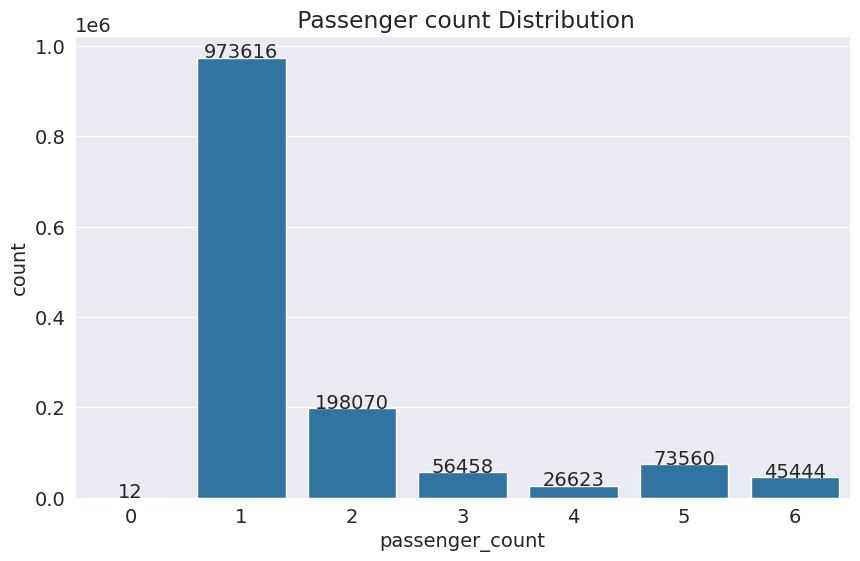

In [38]:
# Create a countplot to visualize the distribution of passenger counts
ax = sns.countplot(x=nyc_df['passenger_count'])
plt.title(' Passenger count Distribution')

# Add labels with the count above each bar in the countplot
for a in ax.patches:
    height = a.get_height()
    ax.text(x=a.get_x() + (a.get_width() / 2),
            y=height + 0.2, ha='center', s='{:.0f}'.format(height))

# Display the countplot
plt.show()


0, 7, or 9, as those values might be outliers or erroneous data. Additionally, it filters the dataset to keep records with passenger counts up to 6, which is a more reasonable range for most taxi trips.

In [39]:
# Remove rows where passenger count is equal to 0, 7, or 9
nyc_df = nyc_df[nyc_df['passenger_count'] != 0]

# Further filter the dataset to retain records where passenger count is less than or equal to 6
nyc_df = nyc_df[nyc_df['passenger_count'] <= 6]

Observation :

*   Mostly Passenger count of taxi is one.
*   Solo explorers use taxi for their trip perticular in New York.

# pickup/dropoff day

Text(0.5, 1.0, 'Number of dropoffs done per day of the week')

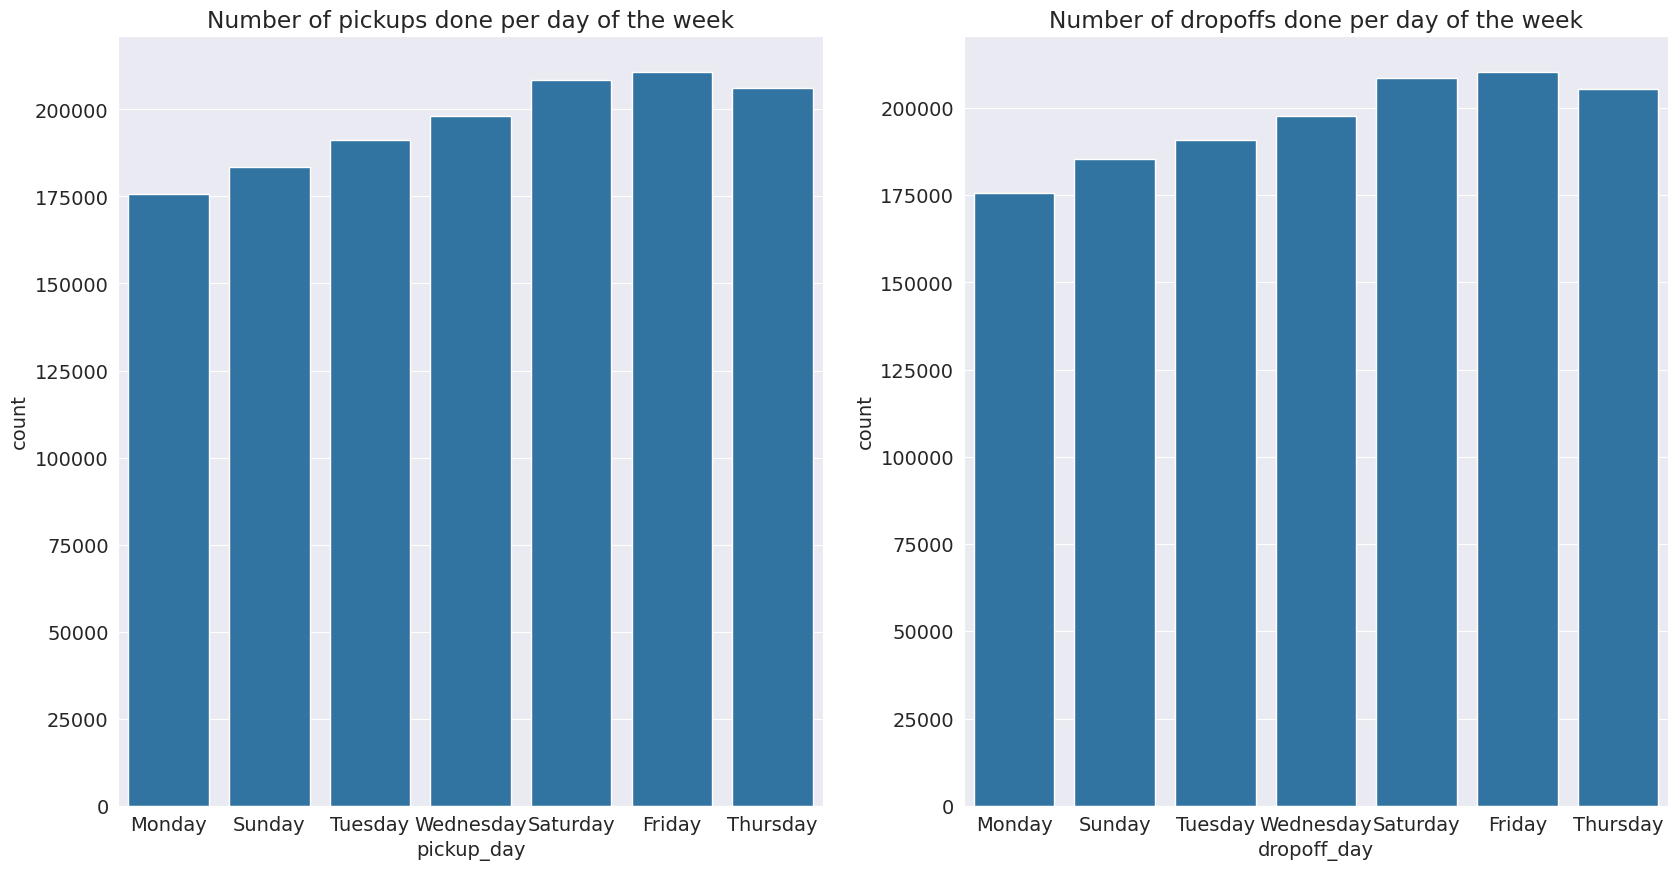

In [40]:
# Create a figure with two subplots, side by side
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Create the first subplot: Number of pickups done on each day of the week
sns.countplot(x='pickup_day', data=nyc_df, ax=ax[0])
ax[0].set_title('Number of pickups done per day of the week')

# Create the second subplot: Number of dropoffs done on each day of the week
sns.countplot(x='dropoff_day', data=nyc_df, ax=ax[1])
ax[1].set_title('Number of dropoffs done per day of the week')

Observation:

*   Demand of taxi is the highest on Fridays and is the lowest on Monday.
*   People mostly use Taxi on Friday to to go somewhere and enjoy their weekends.

*   Its comapratively low on sunday as people might be taking sunday as a rest day or else Traffic on sunday must be really high due to off day.






# Pickup Timezone

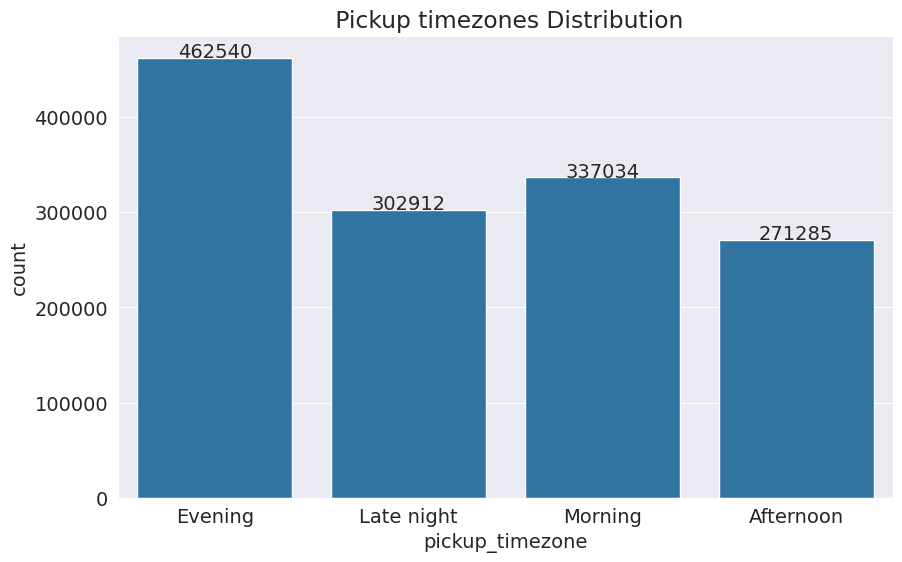

In [41]:
# Create a countplot to visualize the distribution of pickup timezones
ax = sns.countplot(x=nyc_df['pickup_timezone'])
plt.title(' Pickup timezones Distribution')

# Add labels with the count above each bar in the countplot
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + (p.get_width() / 2),
            y=height + 0.2, ha='center', s='{:.0f}'.format(height))



# Display the countplot
plt.show()

Observation:

*   Mostly people travel with taxi in the evening because they are mostly tired of their work and long distance office traveling. Also their can be safety issue as well because taxies are safer than any other vehicle.

*   People travel least during afternoon because of their busy schedule may be.



# pickup_hour and drop off hour

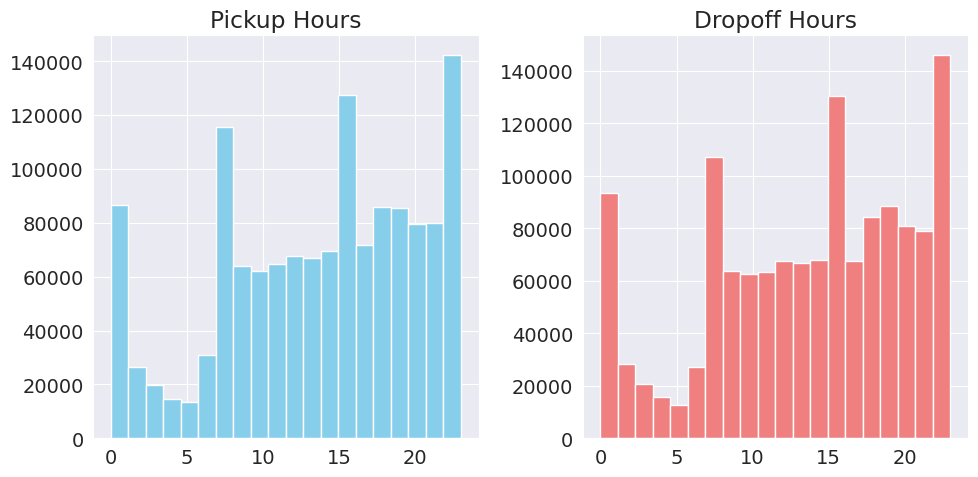

In [42]:
# Create a figure with two subplots, side by side
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Create a histogram for pickup hours in the first subplot
nyc_df.pickup_hour.hist(bins=20, ax=ax[0] , color='skyblue')
ax[0].set_title('Pickup Hours')

# Create a histogram for dropoff hours in the second subplot
nyc_df.dropoff_hour.hist(bins=20, ax=ax[1] , color='lightcoral')
ax[1].set_title('Dropoff Hours')

# Adjust the layout for a more organized presentation
plt.tight_layout()

In [43]:
# Replace 0 hours with 24 hours in the 'pickup_hour' column
nyc_df['pickup_hour'].replace(to_replace=0, value=24, inplace=True)

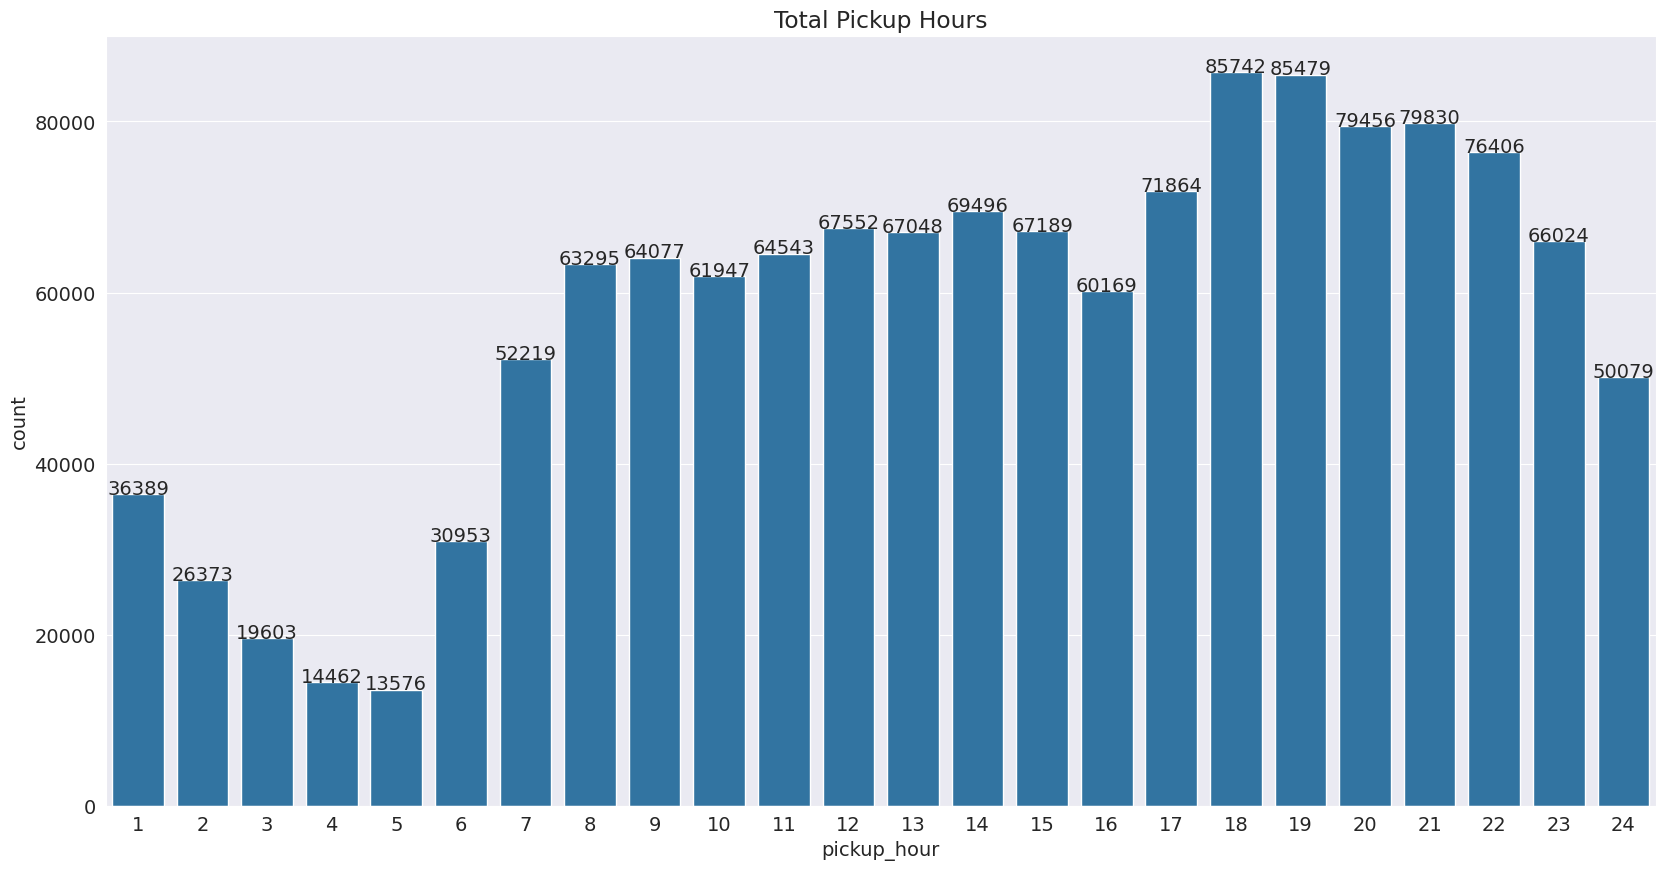

In [44]:
# Create a figure with a specific size for the plot
plt.figure(figsize=(20, 10))

# Create a countplot to visualize the distribution of pickup hours
ax = sns.countplot(x=nyc_df['pickup_hour'])
plt.title('Total Pickup Hours')

# Add labels with the count above each bar in the countplot
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + (p.get_width() / 2),
            y=height + 0.2, ha='center', s='{:.0f}'.format(height))

# Display the countplot
plt.show()

Observation:

*   The busiest hours for taxi trips were observed during the evening, specifically between 6:00 pm to 7:00 pm. This pattern aligns with the time when people typically return from their offices, contributing to increased demand for taxi services.
*   Conversely, the least busy hours for taxi trips were in the early morning, typically between 2:00 am to 5:00 am. During these hours, the demand for taxi services tends to be lower, likely due to reduced travel activity and fewer commuters needing transportation.



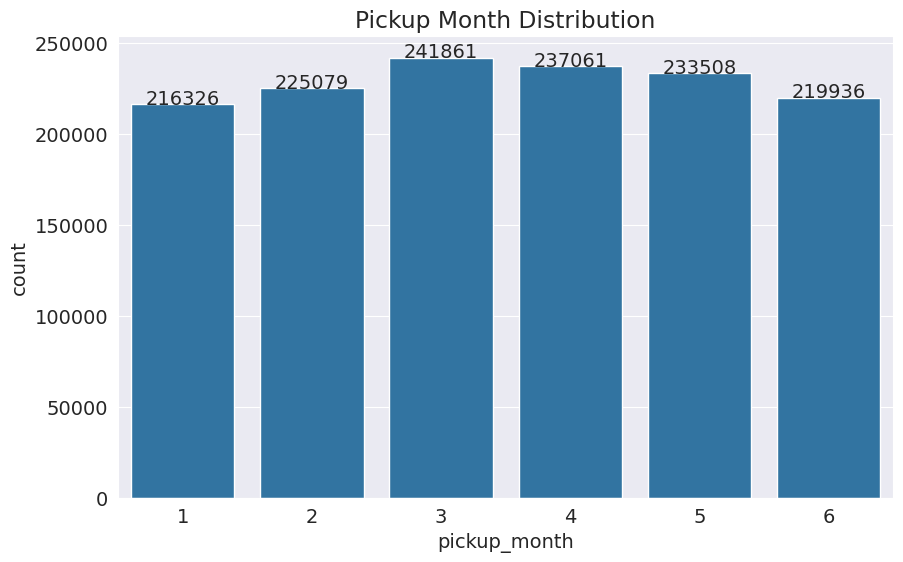

In [45]:
# Create a countplot to visualize the distribution of pickup months
ax = sns.countplot(x=nyc_df['pickup_month'])
plt.title('Pickup Month Distribution')

# Add labels with the count above each bar in the countplot
for p in ax.patches:
    height = p.get_height()  # Fix the syntax error here (change "get height" to "get_height")
    ax.text(x=p.get_x() + (p.get_width() / 2),
            y=height + 0.2, ha='center', s='{:.0f}'.format(height))

# Display the countplot
plt.show()


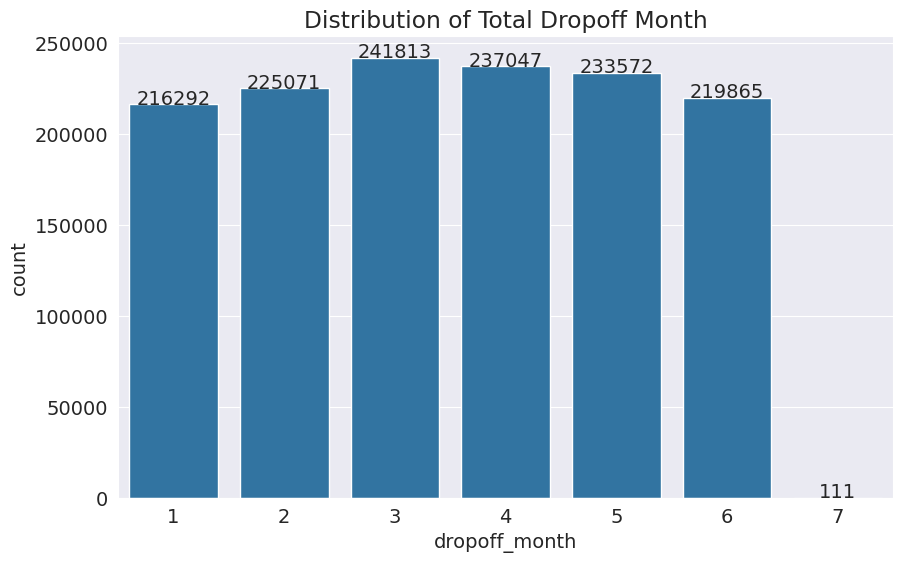

In [46]:
# Create a countplot to visualize the distribution of dropoff months
ax = sns.countplot(x=nyc_df['dropoff_month'])
plt.title('Distribution of Total Dropoff Month')

# Add labels with the count above each bar in the countplot
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + (p.get_width() / 2),
            y=height + 0.2, ha='center', s='{:.0f}'.format(height))

# Display the countplot
plt.show()


Observation :

*   The month of March has received the highest number of trips followed by April for both pickup/dropoff.
*   The least number of trips done in the month of January and July.



# Bivariate Data Analysis

Passenger Count vs Vendor id

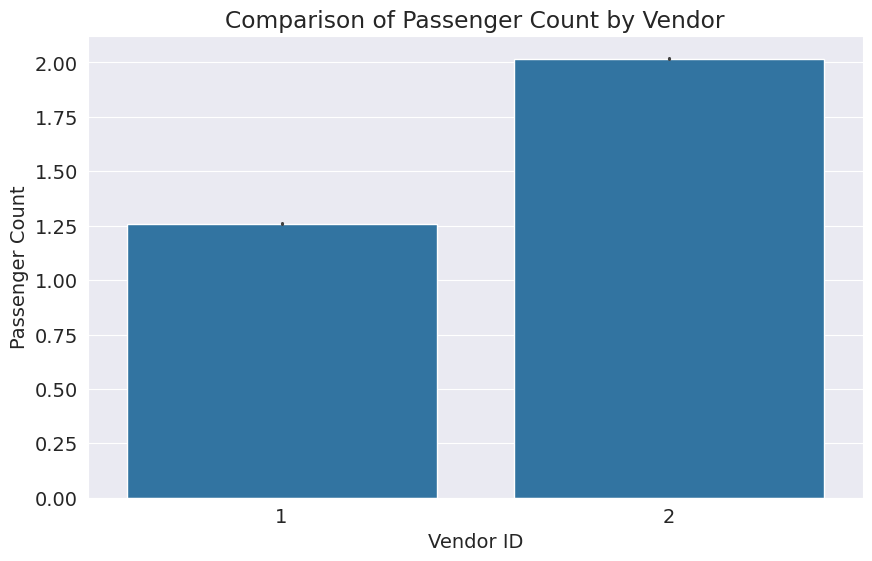

In [47]:
# Create a barplot to compare passenger count between different vendor IDs
sns.barplot(x='vendor_id', y='passenger_count', data=nyc_df)
plt.title('Comparison of Passenger Count by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Passenger Count')
plt.show()


The countplot reveals that vendor 2 typically accommodates an average of 2 passengers per ride, while vendor 1 tends to provide rides with an average of 1 passenger on board.

# Trip Duration per time zone

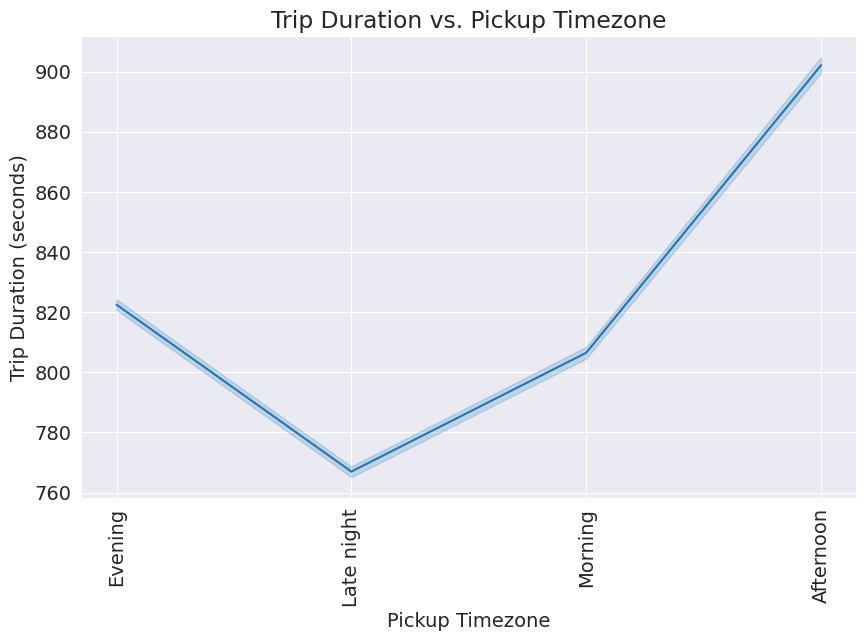

In [48]:
# Create a lineplot to visualize the relationship between pickup timezone and trip duration
sns.lineplot(x='pickup_timezone', y='trip_duration', data=nyc_df)
plt.title('Trip Duration vs. Pickup Timezone')
plt.xlabel('Pickup Timezone')
plt.ylabel('Trip Duration (seconds)')
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.show()

The lineplot indicates that trip duration tends to peak during the afternoon hours and reaches its lowest point during the late night and early morning hours. This suggests that, on average, taxi trips have the longest durations in the afternoon and are shortest during the late night to early morning period.

**# Trip Duration per different days**

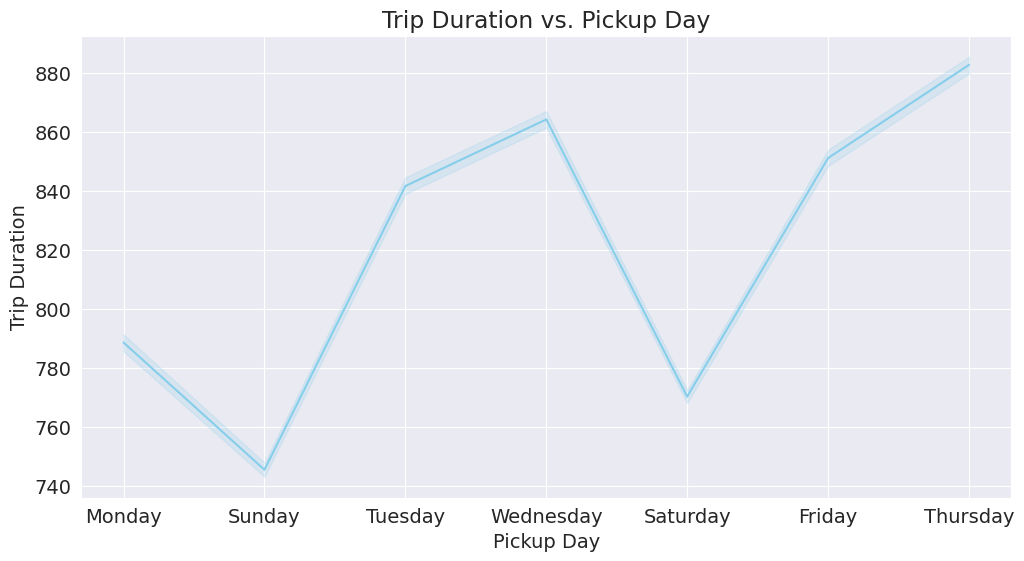

In [49]:
# Create a line plot to visualize trip duration across different pickup days
plt.figure(figsize=(12, 6))  # Set the figure size

# Use Seaborn's lineplot to plot 'pickup_day' on the x-axis and 'trip_duration' on the y-axis
sns.lineplot(x='pickup_day', y='trip_duration', data=nyc_df, color='skyblue')

# Customize the plot labels and title
plt.title('Trip Duration vs. Pickup Day')
plt.xlabel('Pickup Day')
plt.ylabel('Trip Duration')

# Show the plot
plt.show()

The line plot illustrates that trip duration peaks on Wednesdays and typically hits its lowest points on Sundays. This observation implies that taxi trips, on average, endure their lengthiest periods during midweek, notably on Wednesdays, while experiencing their briefest durations on Sundays.

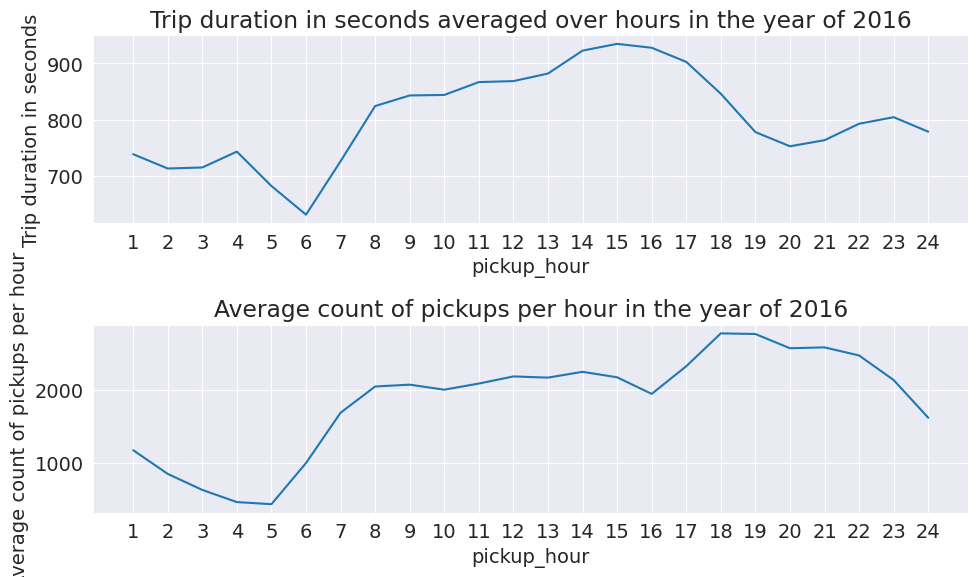

In [50]:
#Plotting average trip duration for each hour over the entire year
ax1 = plt.subplot(211)
nyc_df.groupby(nyc_df.pickup_hour)['trip_duration'].mean().plot(ax = ax1, figsize=(10,6))
plt.ylabel('Trip duration in seconds')
plt.xticks(nyc_df.pickup_hour.unique())
plt.title('Trip duration in seconds averaged over hours in the year of 2016')

# Plotting the average number of rides per hour
ax2 = plt.subplot(212)
nyc_df.groupby(['pickup_date', 'pickup_hour']).count()['vendor_id'].groupby('pickup_hour').mean().plot(ax = ax2, figsize=(10,6))
plt.ylabel('Average count of pickups per hour')
plt.xticks(nyc_df.pickup_hour.unique())
plt.title('Average count of pickups per hour in the year of 2016')
plt.tight_layout()


As expected, both trip duration and the frequency of rides demonstrate an uptick during the evening hours. This pattern arises naturally, as a higher concentration of rides in a given area typically leads to increased traffic, consequently elongating trip durations.

In the second visualization, we note a gradual uptrend in pickup numbers from 5 am to 8 am, followed by a period of stability between 8 am and 4 pm. Subsequently, there's another noticeable surge in pickups from 4 pm to 6 pm, succeeded by a subsequent decline.

During the evening period, the average trip duration stabilizes around 15 minutes, highlighting a common trend of relatively shorter and more efficient trips during this timeframe.

# **Heatmap**

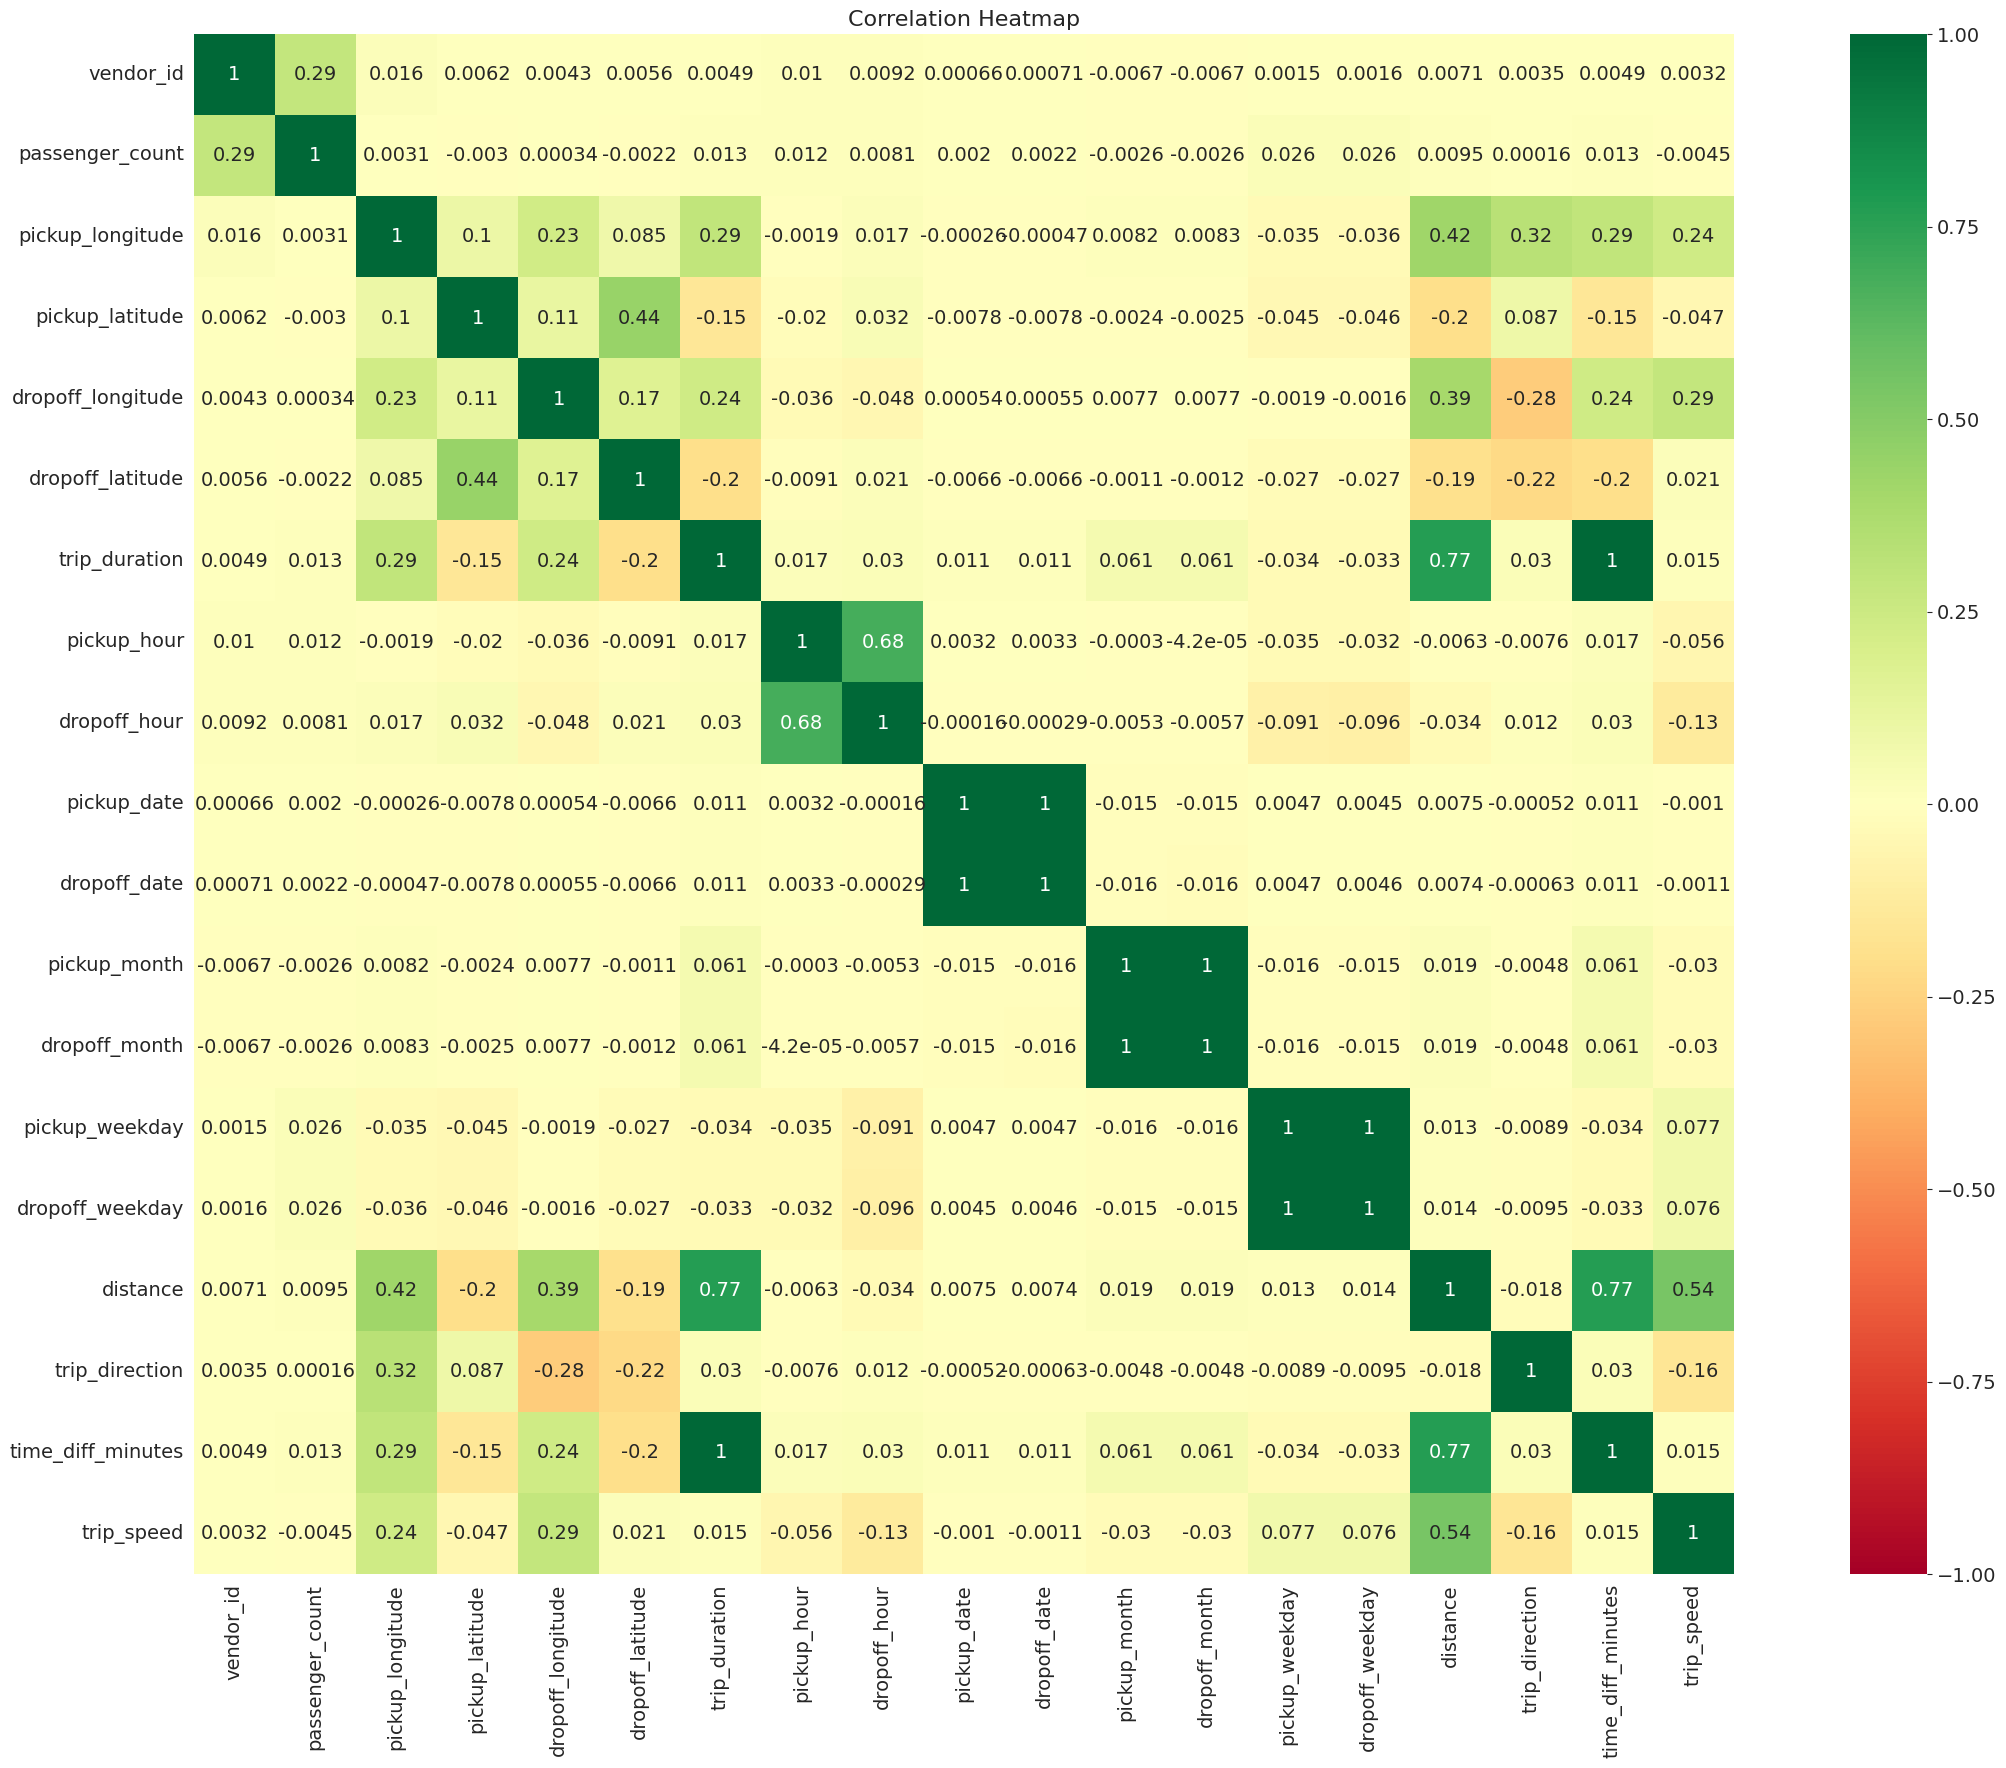

In [51]:
# Set the figure size for the heatmap
plt.figure(figsize=(30, 20))

# Create a correlation heatmap for the DataFrame
sns.heatmap(nyc_df.corr(), cmap='RdYlGn', annot=True, vmin=-1, vmax=1, square=True)

# Set the title for the heatmap
plt.title("Correlation Heatmap", fontsize=16)

# Display the heatmap
plt.show()



*   Upon examining the correlation heatmap, it's apparent that certain variables demonstrate strong correlations with their counterparts. Notably, there's a considerable correlation between pickup_month and dropoff_month, pickup_date and dropoff_date, as well as pickup_weekday and dropoff_weekday.

*   Moreover, our target variable, trip_duration, exhibits a significant correlation of 0.77% with the distance variable. Additionally, pickup_hour and dropoff_hour display a notable correlation of 0.68.

*   To address multicollinearity, a practical approach involves retaining pickup details while discarding dropoff details for variables with high correlations. This strategy simplifies the model, reduces redundancy, and preserves the most informative features.

*   In this context, it's advisable to remove the time_diff_minutes variable due to its high correlation with trip_duration. This streamlined dataset, with minimized multicollinearity, has the potential to improve the model's performance and interpretability.






In [52]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [53]:
calc_vif(nyc_df[[i for i in nyc_df.describe().columns if i  in [
 'passenger_count',
 'pickup_weekday',
 'pickup_hour',
 'pickup_month',
 'pickup_date','distance',
 'trip_direction']]])

,variables,VIF
0,passenger_count,2.437565
1,pickup_hour,4.834519
2,pickup_date,3.557373
3,pickup_month,4.244865
4,pickup_weekday,3.021079
5,distance,1.854131
6,trip_direction,2.847066


# **Feature Engineering**

# Multivariate Normality Distribution check and Handling Skewness

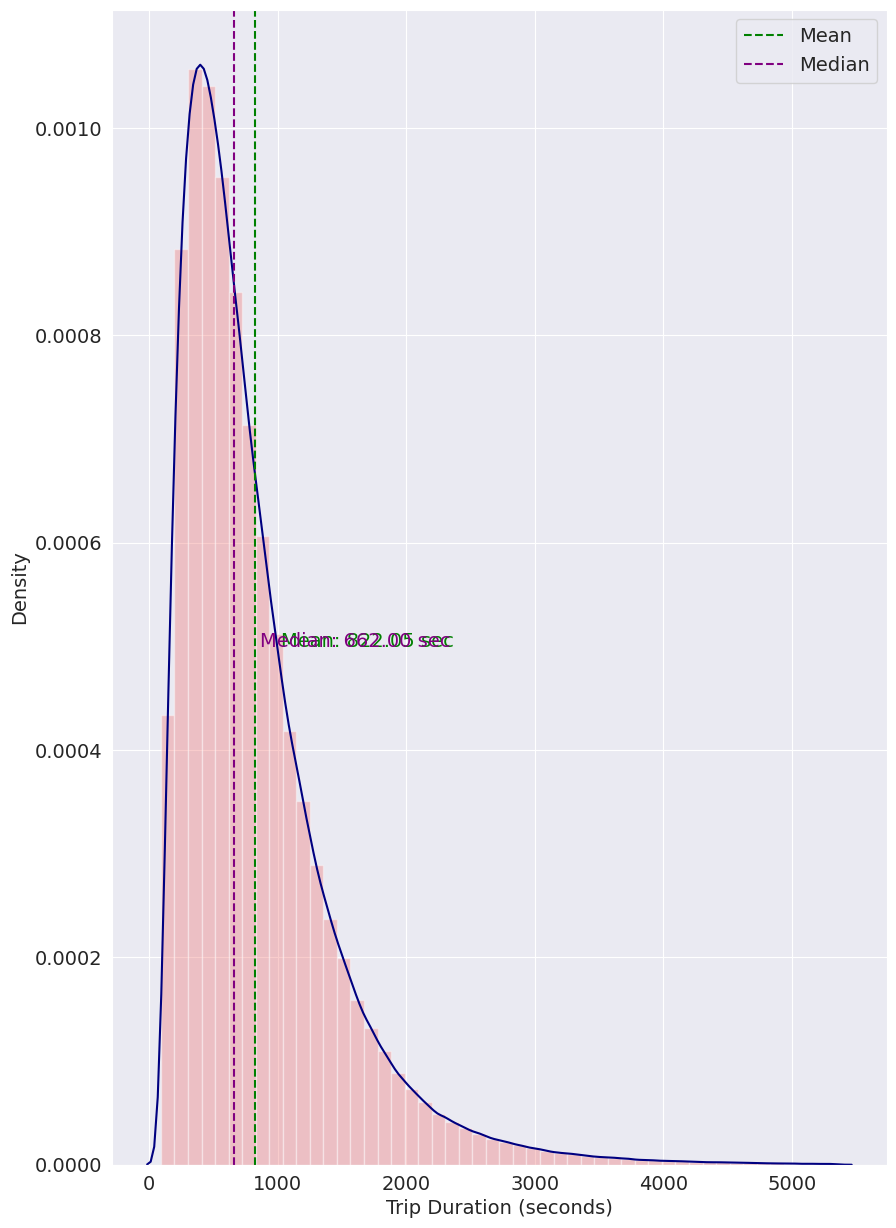

In [54]:
# Set the figure size for the distribution plot
plt.figure(figsize=(10, 15))

# Create a distribution plot for the target variable 'trip_duration'
sns.distplot(nyc_df['trip_duration'], color='skyblue', kde_kws={'color': 'navy'}, hist_kws={'color': 'lightcoral'})

# Add labels and a vertical line for the mean
plt.xlabel('Trip Duration (seconds)')
plt.axvline(nyc_df['trip_duration'].mean(), color='green', linestyle='--', label='Mean')
plt.text(nyc_df['trip_duration'].mean() + 200, 0.0005, f"Mean: {nyc_df['trip_duration'].mean():.2f} sec", color='green')

# Add a vertical line for the median
plt.axvline(nyc_df['trip_duration'].median(), color='purple', linestyle='--', label='Median')
plt.text(nyc_df['trip_duration'].median() + 200, 0.0005, f"Median: {nyc_df['trip_duration'].median():.2f} sec", color='purple')

# Set a legend for the mean and median lines
plt.legend()

# Display the distribution plot
plt.show()

Looks right skewed distribution . We need transformation technique to remove skewness

Some methods to remove skewness are :

*   square-root for moderate skew: sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data
*   log for greater skew:log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

*   inverse for severe skew: 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data




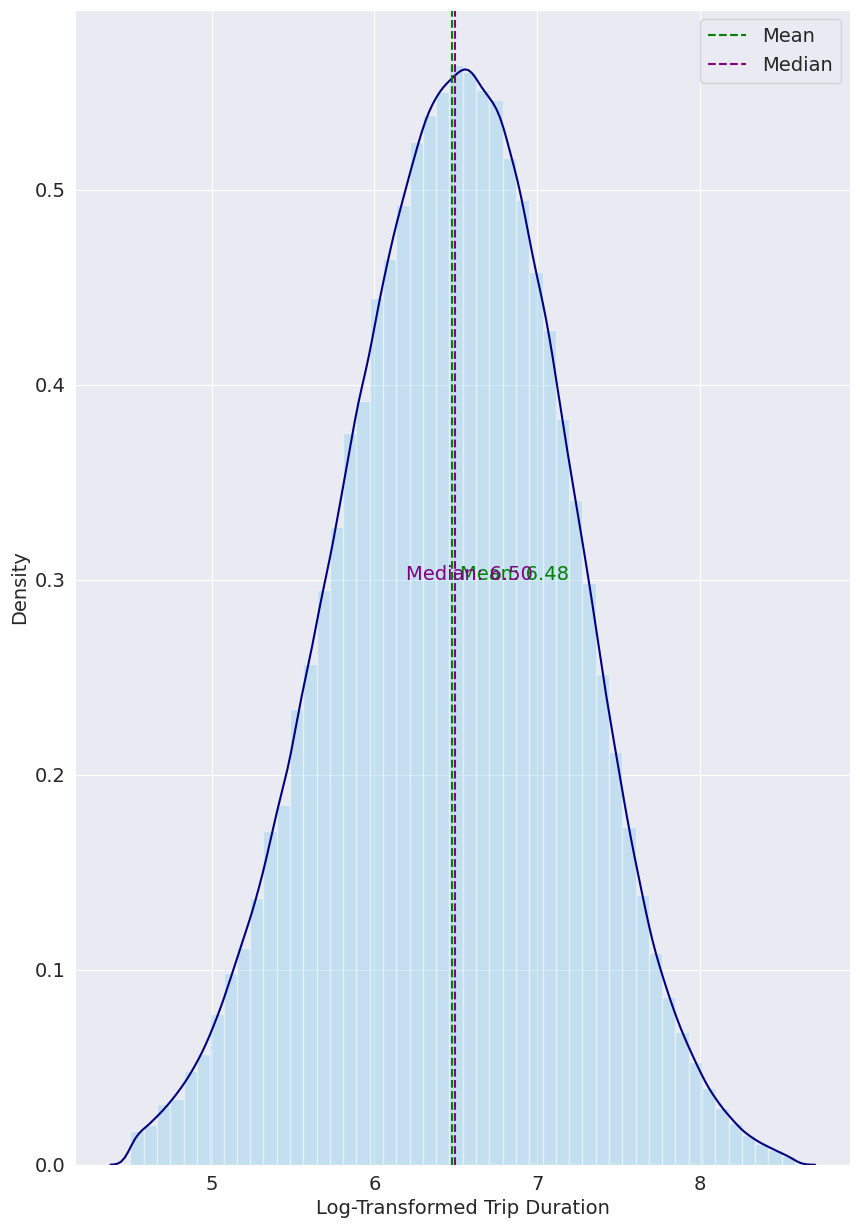

In [55]:
# Set the figure size for the distribution plot
plt.figure(figsize=(10, 15))

# Create a distribution plot for the log-transformed 'trip_duration'
sns.distplot(np.log(nyc_df['trip_duration']), color='lightcoral', kde_kws={'color': 'navy'}, hist_kws={'color': 'skyblue'})

# Add labels and a vertical line for the mean
plt.xlabel('Log-Transformed Trip Duration')
plt.axvline(np.log(nyc_df['trip_duration']).mean(), color='green', linestyle='--', label='Mean')
plt.text(np.log(nyc_df['trip_duration']).mean() + 0.05, 0.3, f"Mean: {np.log(nyc_df['trip_duration']).mean():.2f}", color='green')

# Add a vertical line for the median
plt.axvline(np.log(nyc_df['trip_duration']).median(), color='purple', linestyle='--', label='Median')
plt.text(np.log(nyc_df['trip_duration']).median() - 0.3, 0.3, f"Median: {np.log(nyc_df['trip_duration']).median():.2f}", color='purple')

# Set a legend for the mean and median lines
plt.legend()

# Display the distribution plot
plt.show()

Now the distribution looks normal

# Checking distribution of numerical variabes

In [56]:
numeric_variables=nyc_df.describe().columns

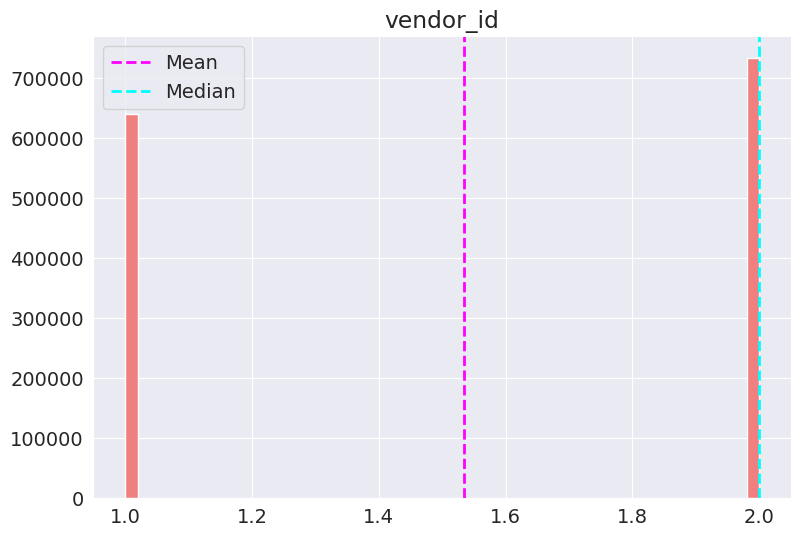

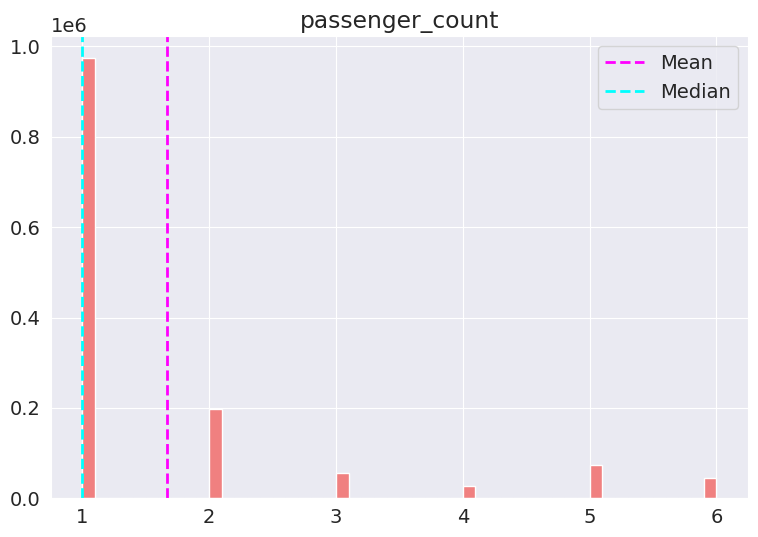

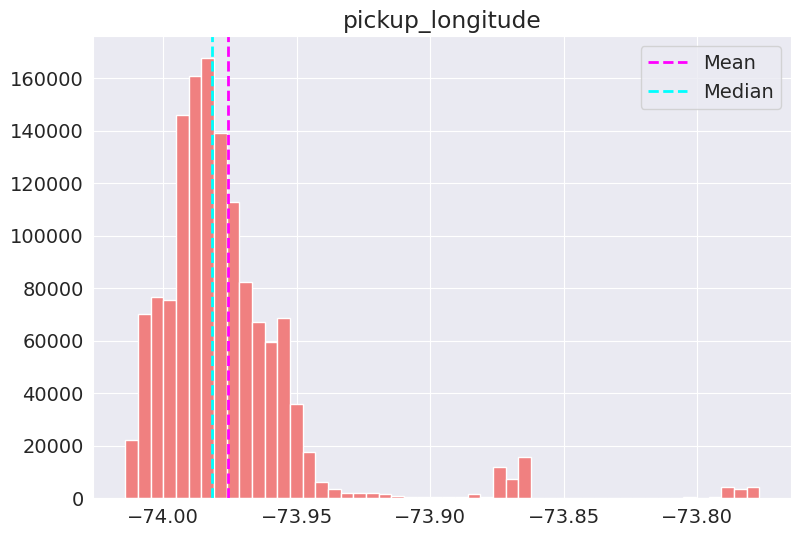

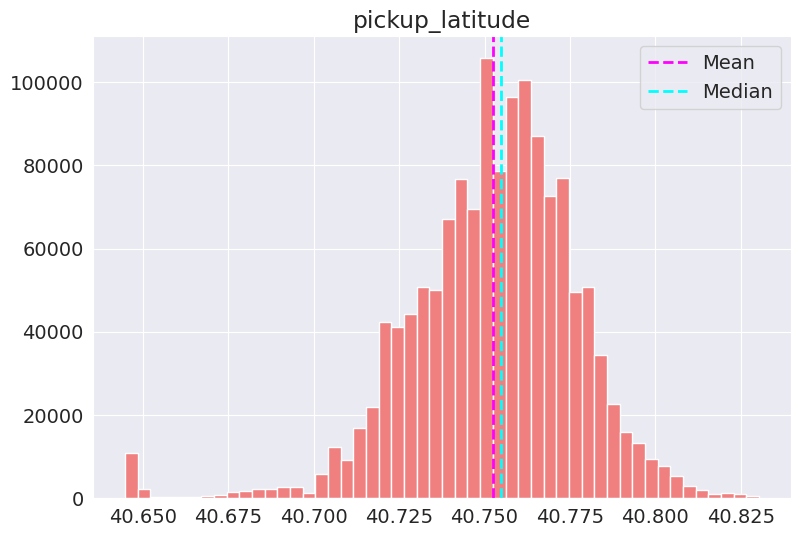

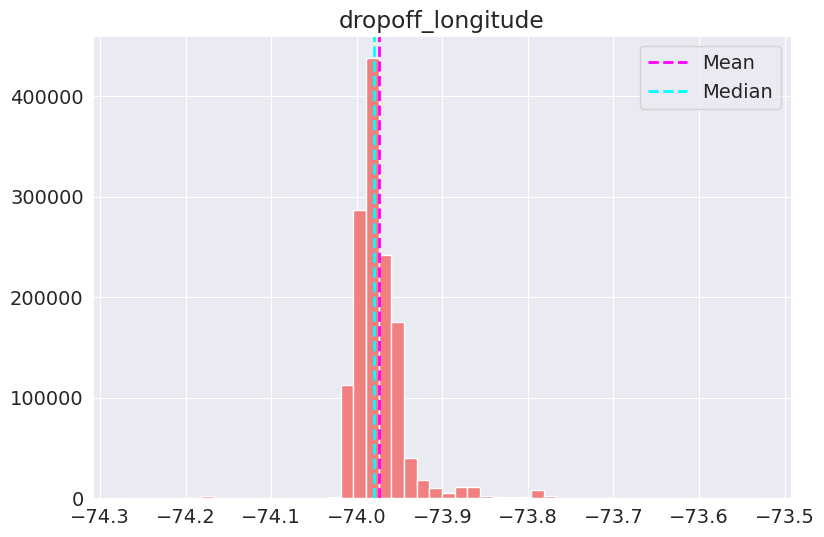

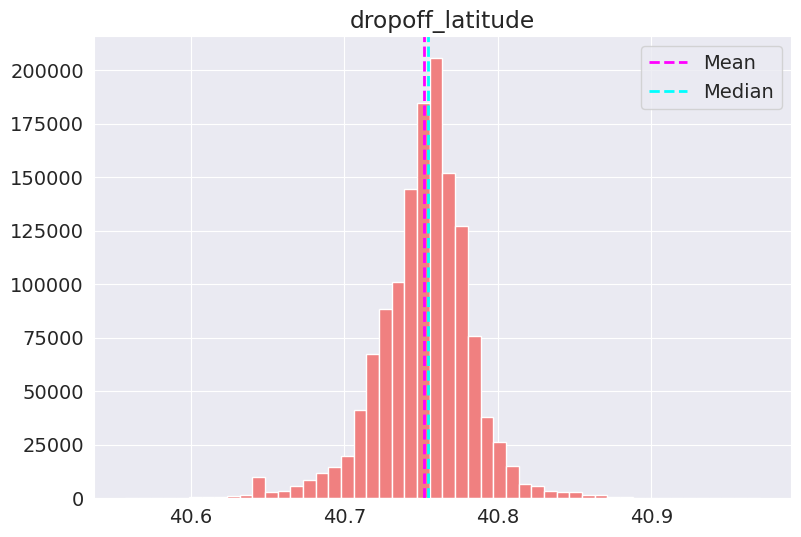

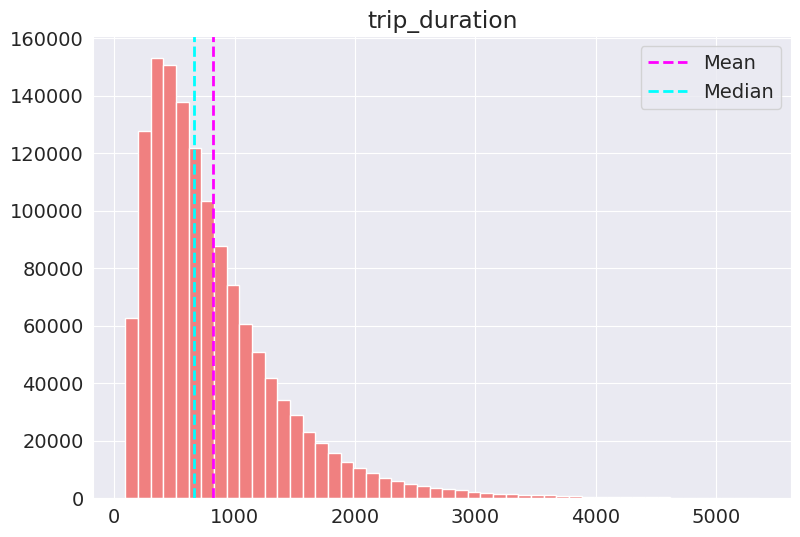

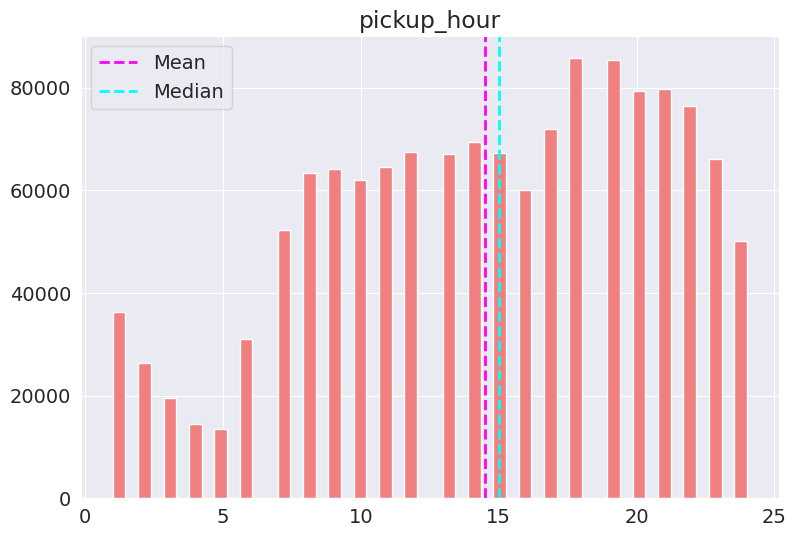

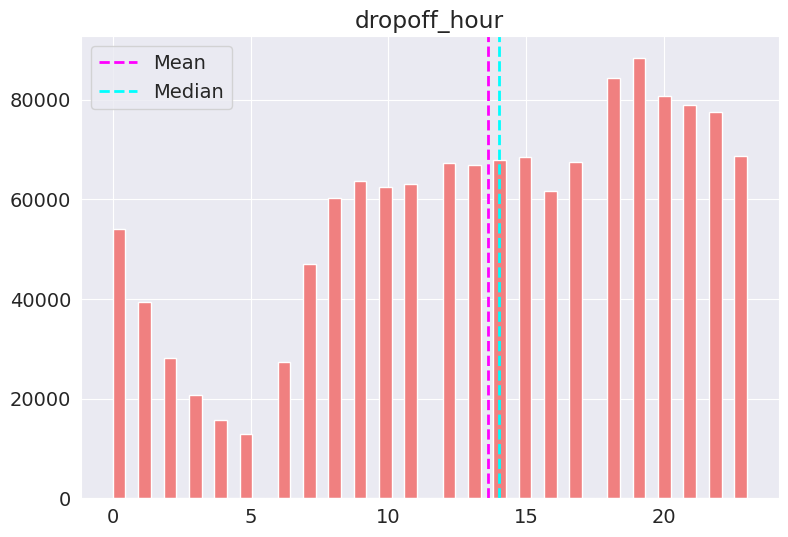

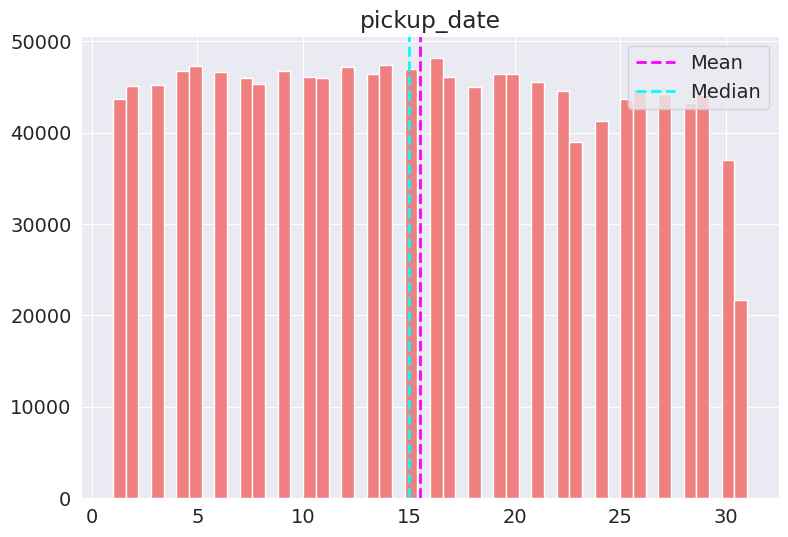

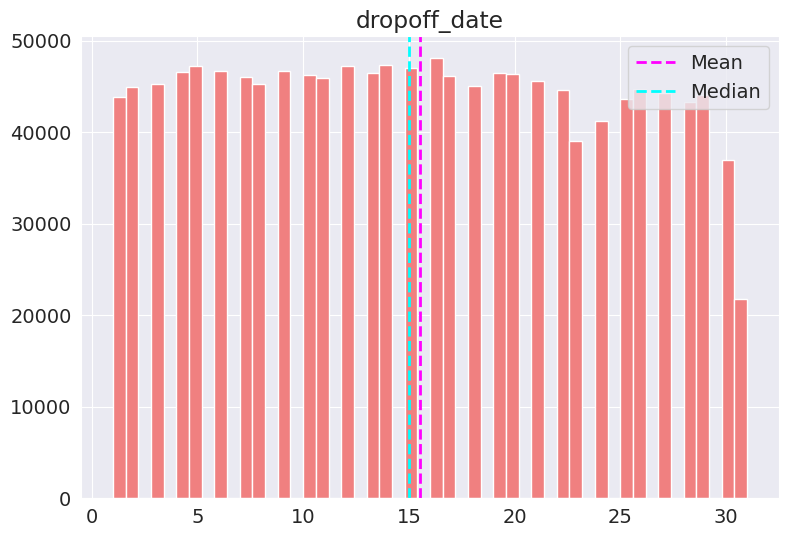

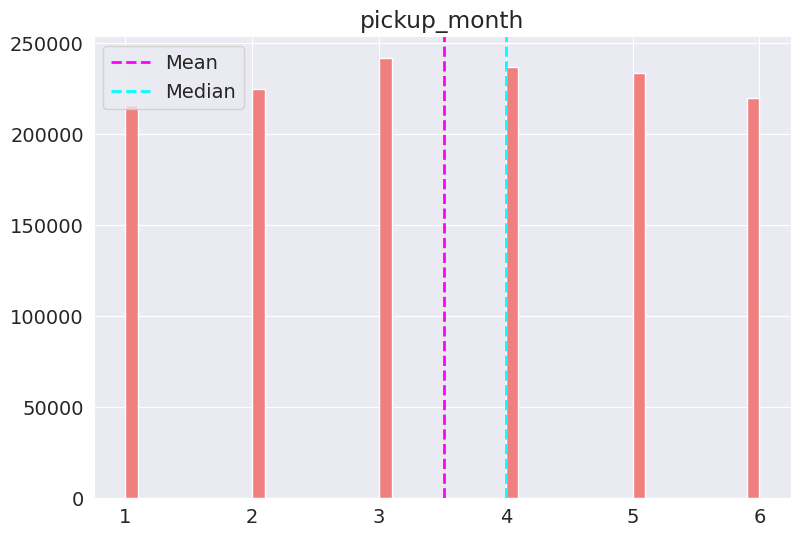

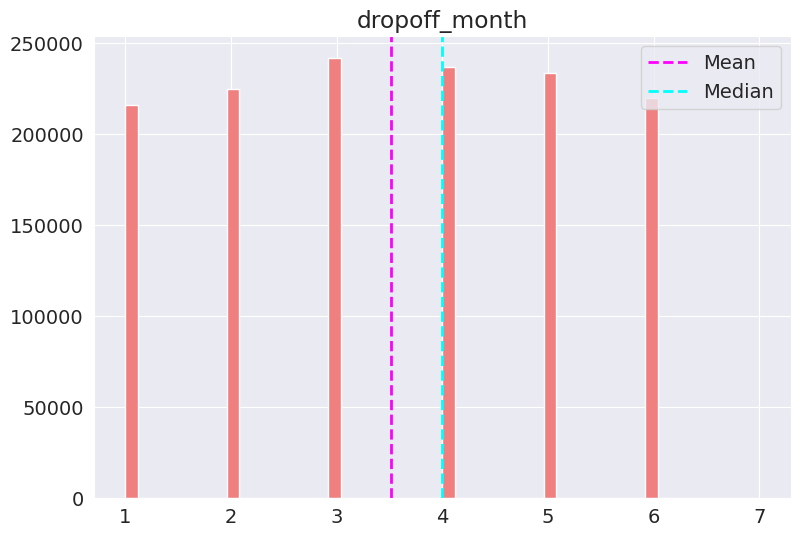

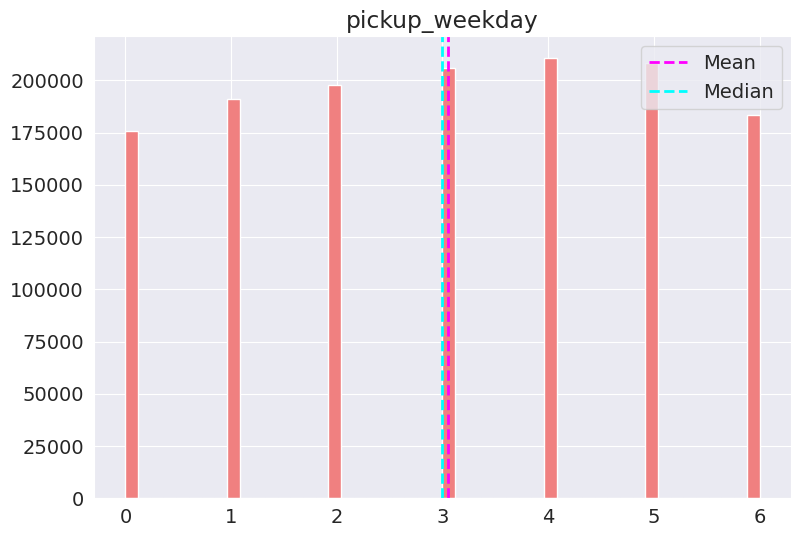

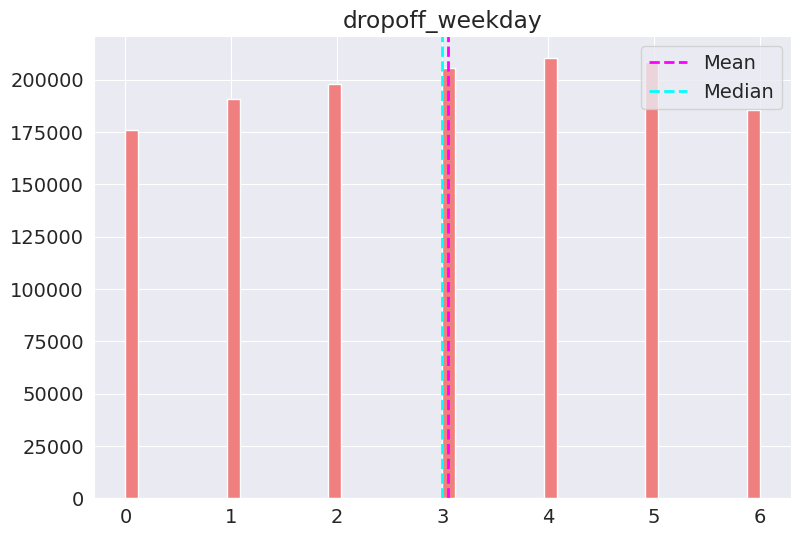

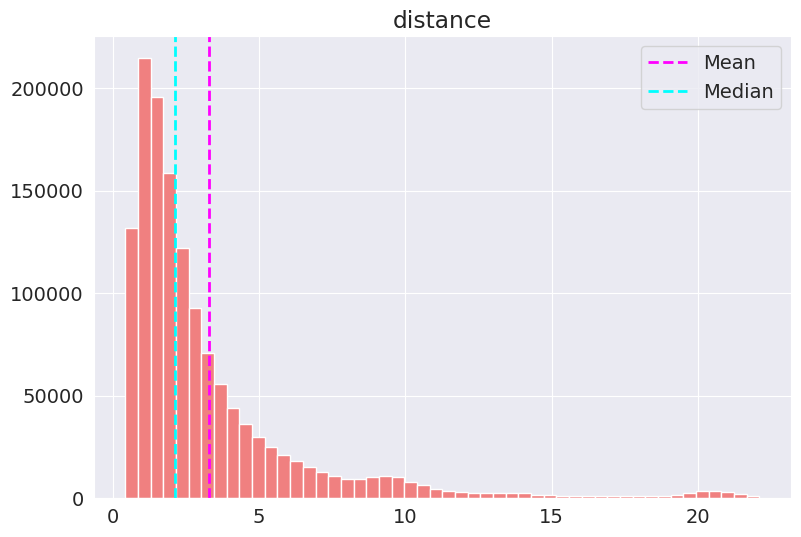

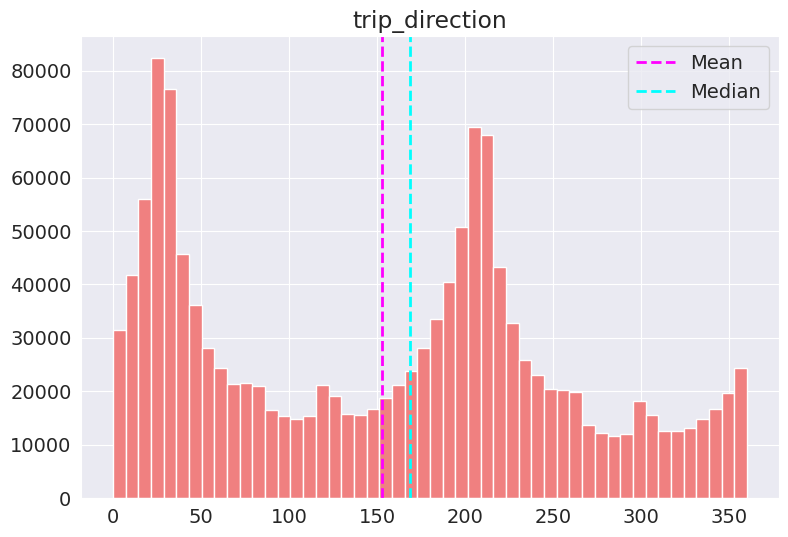

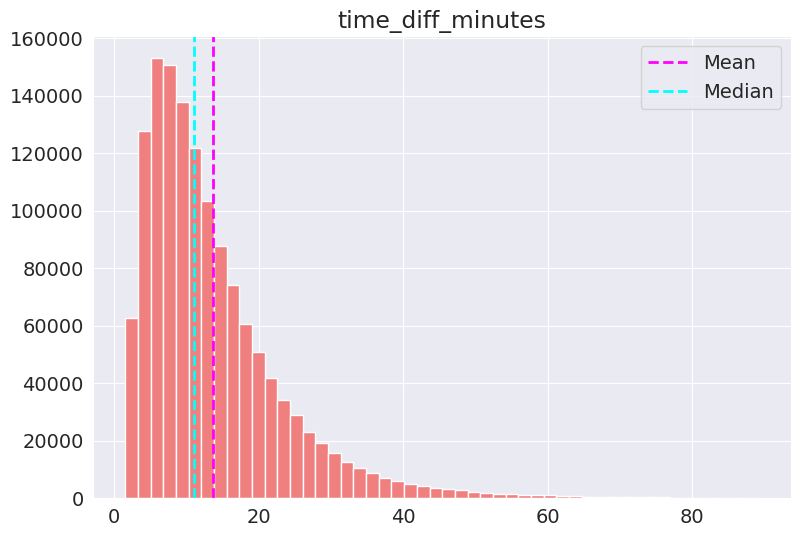

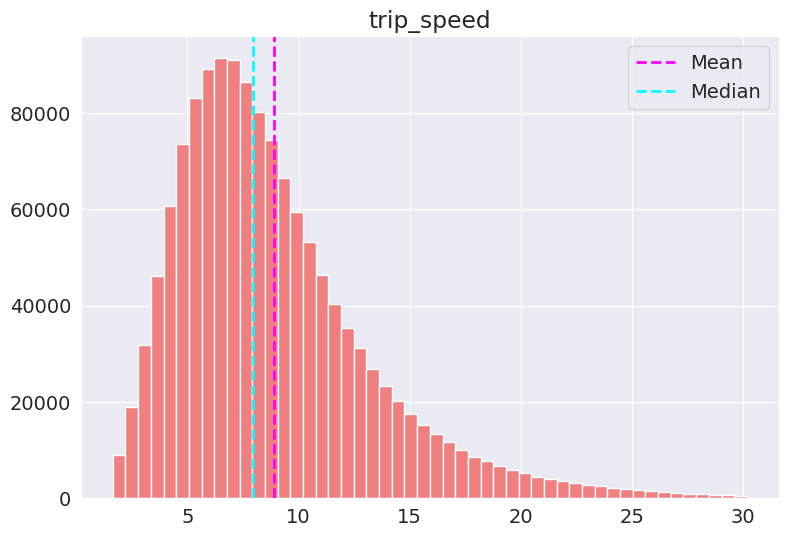

In [57]:
# Iterate through each numerical feature
for col in numeric_variables:
    # Create a new figure with a specific size for the histogram plot
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()

    # Get the feature data
    feature = nyc_df[col]

    # Create a histogram with 50 bins for the feature
    feature.hist(bins=50, ax=ax, color='lightcoral')

    # Add vertical dashed lines for the mean and median
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')

    # Set the title of the plot to the feature name
    ax.set_title(col)

    # Add a legend for the mean and median lines
    ax.legend()

# Display all the histogram plots
plt.show()




*   Treating the skewness in the distance feature using log transform.
*   trip_speed,time_diff_minutes features are highly in correaltion with our target variable and it may result in data leakage and getting high accuracy near to 100 percentage hence we will not handle the skewness in these features and directly drop these features before model buliding



# Lets check distribution of distance

Text(0.5, 0, 'distance')

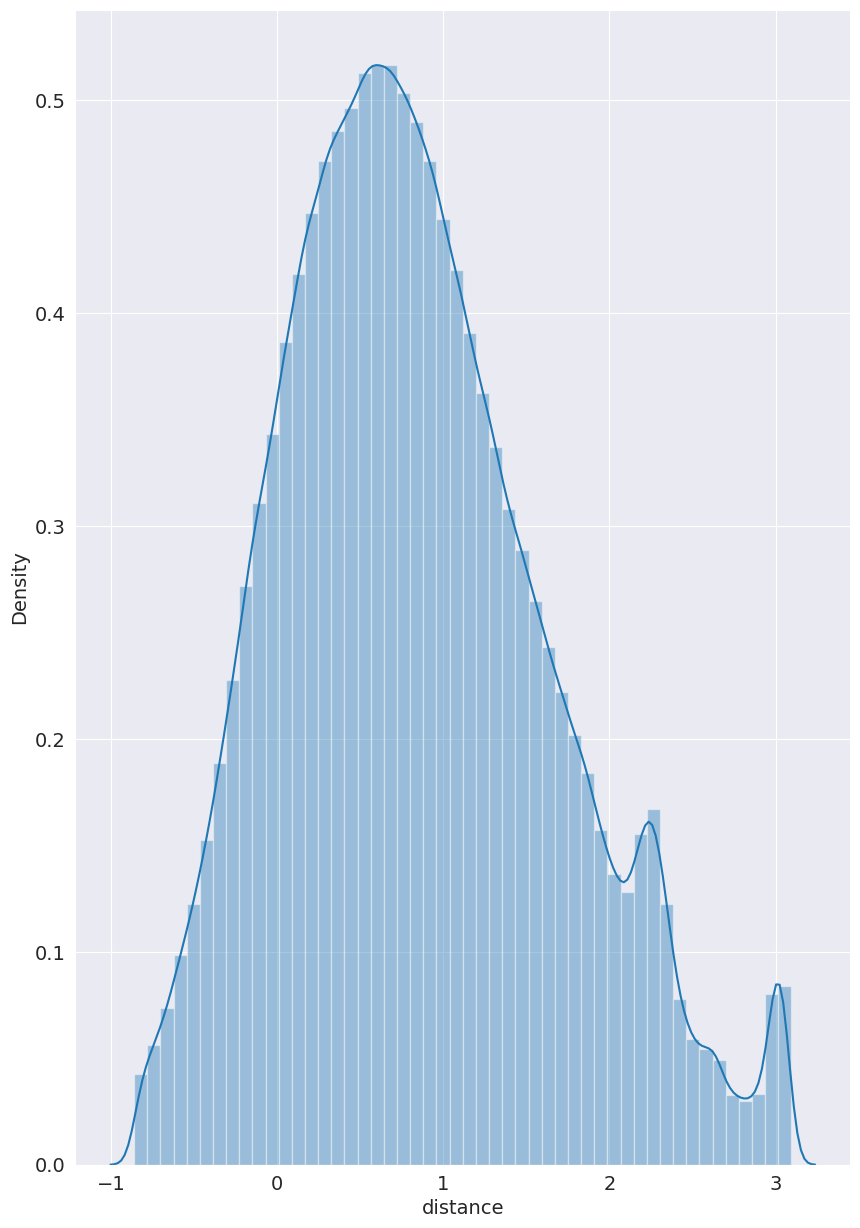

In [58]:
plt.figure(figsize=(10,15))
sns.distplot(np.log(nyc_df['distance']))
plt.xlabel('distance')

# **Checking Linear Relationships**

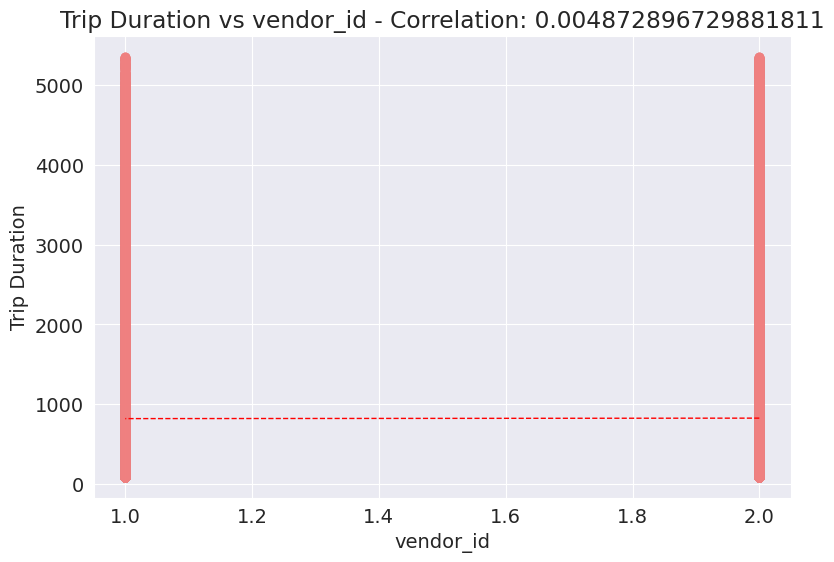

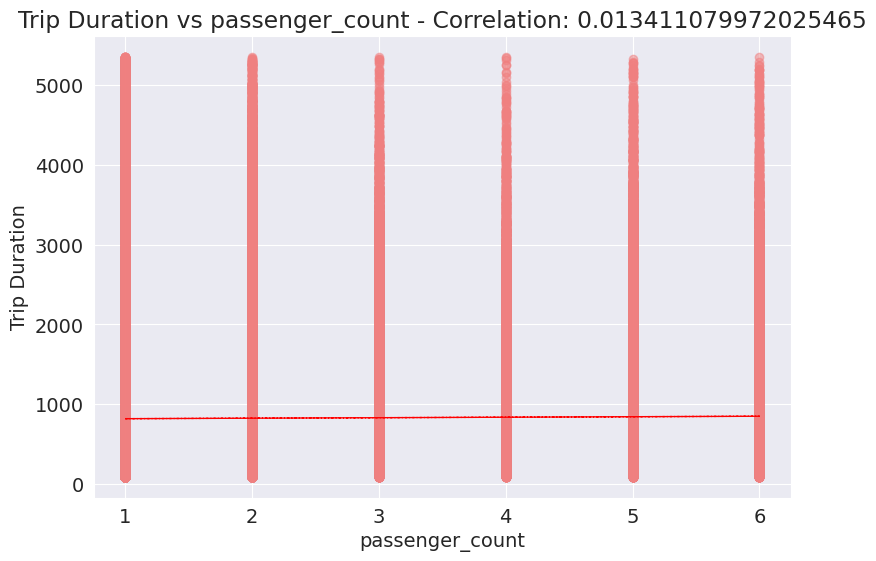

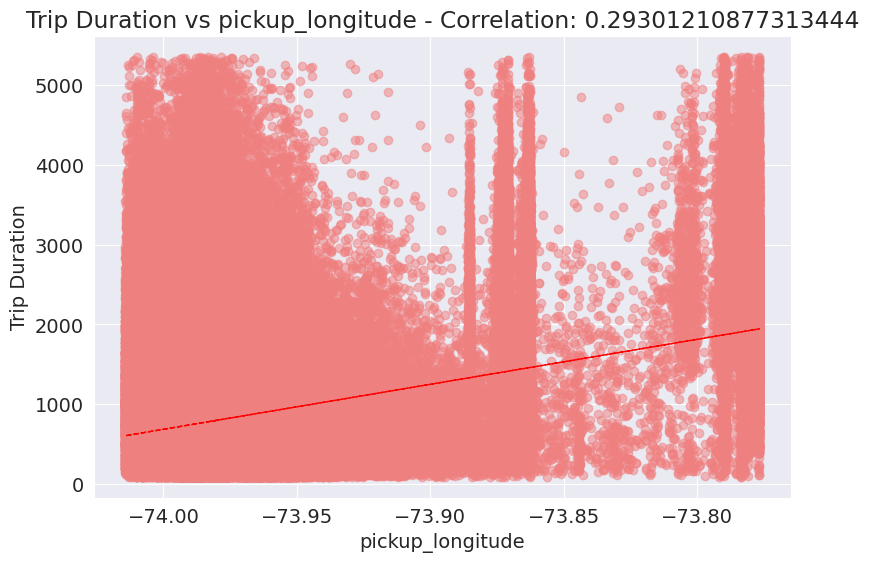

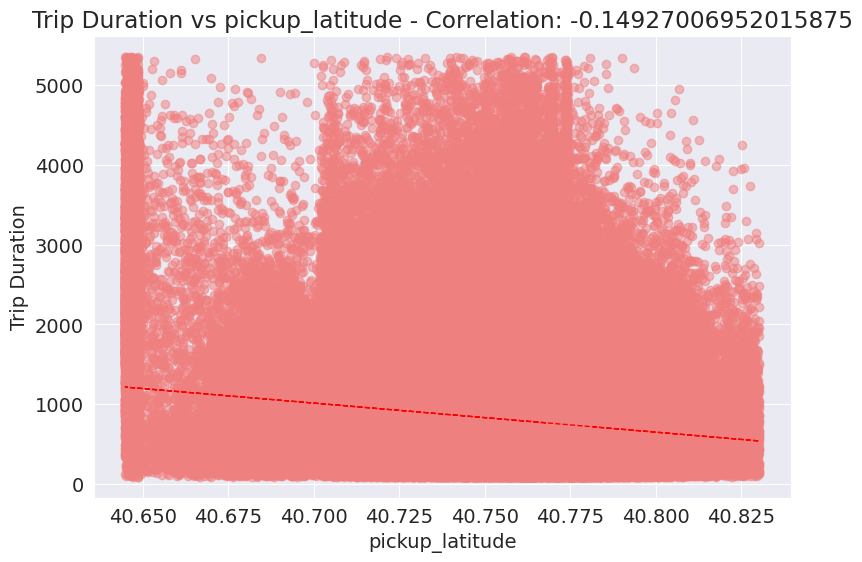

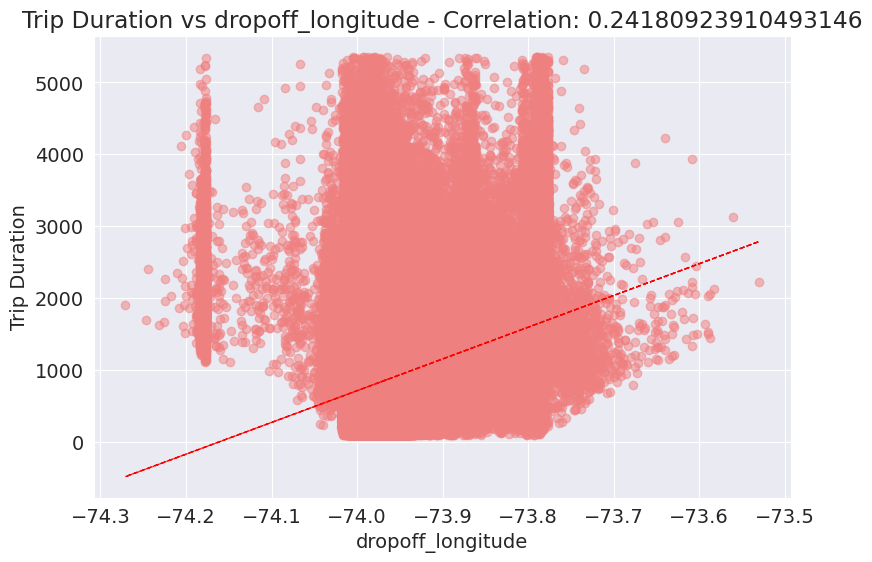

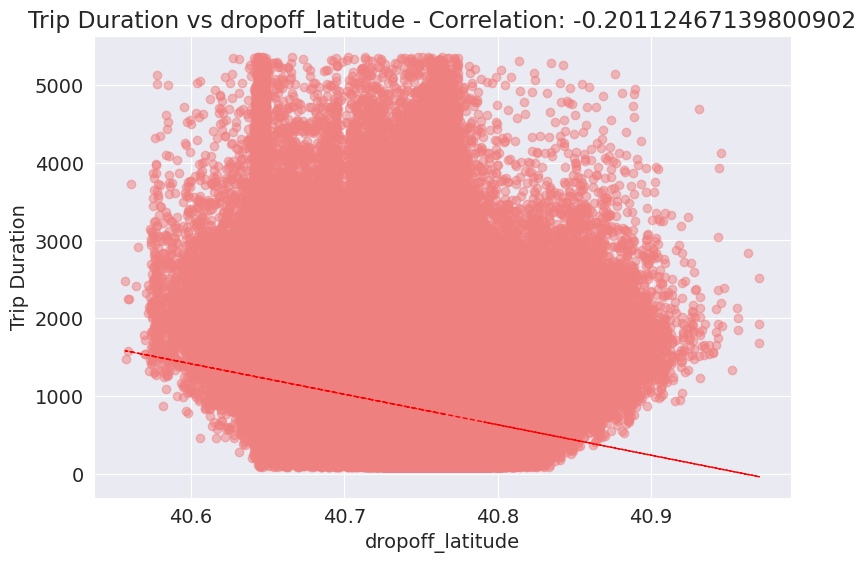

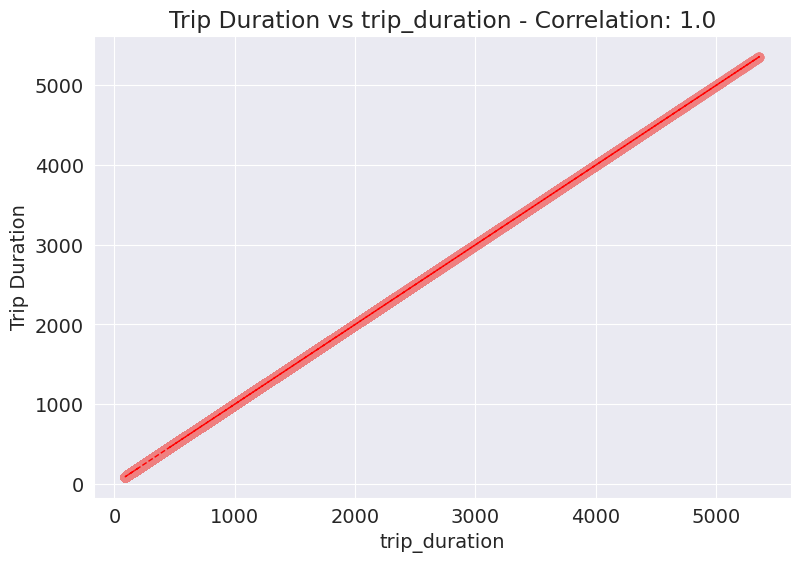

In [ ]:
# Iterate through each numerical feature
for col in numeric_variables[:]:
    # Create a new figure with a specific size for the scatter plot
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()

    # Get the feature data
    feature = nyc_df[col]
    label = nyc_df['trip_duration']

    # Calculate the correlation between the feature and 'trip_duration'
    correlation = feature.corr(label)

    # Create a scatter plot
    plt.scatter(x=feature, y=label, color='lightcoral', alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Trip Duration')

    # Set the title of the plot to show feature vs. trip_duration and its correlation
    ax.set_title('Trip Duration vs ' + col + ' - Correlation: ' + str(correlation))

    # Fit a regression line to the data
    z = np.polyfit(nyc_df[col], nyc_df['trip_duration'], 1)
    y_hat = np.poly1d(z)(nyc_df[col])

    # Plot the regression line in red dashes
    plt.plot(nyc_df[col], y_hat, "r--", lw=1)

# Display all the scatter plots
plt.show()


From above plot we can conclude that only trip_distance and trip_speed were having a linear relationship with trip_duration

# Encoding Categorical Features

In [ ]:
#copy the dataframe
nyc_df_copy = nyc_df.copy()

In [ ]:
#drop these columns
nyc_df_copy.drop(labels=['dropoff_timezone','store_and_fwd_flag',],axis=1,inplace=True)

In [ ]:
# One hot encoding on pickup_timezone feature
nyc_df_copy = pd.get_dummies(nyc_df_copy,columns=["pickup_timezone"],prefix=["pickup_timezone"])

In [ ]:
nyc_df_copy.head()

# Handling Skewness in numerical features using log Transform

In [ ]:
nyc_df_copy['distance'] = nyc_df_copy['distance'].map(lambda x : np.log(x) if x != 0 else 0)

In [ ]:
nyc_df_copy['pickup_month'] = nyc_df_copy['pickup_month'].map(lambda x : np.log(x) if x != 0 else 0)
nyc_df_copy['pickup_hour'] = nyc_df_copy['pickup_hour'].map(lambda x : np.log(x) if x != 0 else 0)
nyc_df_copy['passenger_count'] = nyc_df_copy['passenger_count'].map(lambda x : np.sqrt(x) if x != 0 else 0)

In [ ]:
nyc_df_copy.shape


# Feature Selection

We cannot use all the columns from the dataframe because some of them are datetime and some of them were calculated based on the target variable such as trip_speed_mph.

So, we will use only the following columns: cols_to_use = ['vendorid', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_month', 'pickup_weekday', 'pickup_hour', 'distance, 'trip_direction', 'trip_duration']

In [ ]:
features = ['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'pickup_weekday',
 'pickup_hour',
 'pickup_month',
 'pickup_date','distance',
 'trip_direction']

In [ ]:
features.extend(['pickup_timezone_Afternoon', 'pickup_timezone_Evening',
       'pickup_timezone_Late night', 'pickup_timezone_Morning'])

# Splitting the data

In [ ]:
#Splitting data
X = nyc_df_copy[features] #Independent features
y = np.log(nyc_df_copy['trip_duration'])  #Dependent features

In [ ]:
X.shape, y.shape

In [ ]:
X = nyc_df_copy[features] #Independent features
y = np.log(nyc_df_copy['trip_duration'])  #Dependent features

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

In [ ]:
# Import the StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
sc = StandardScaler()

# Apply the StandardScaler to the selected features in the training set
X_train[features] = sc.fit_transform(X_train[features])

# Apply the same StandardScaler to the selected features in the test set
X_test[features] = sc.transform(X_test[features])

**Buliding a base model using Linear Regression**

We have many variables such as the pickup/dropoff month, weekday, hour of the day, trip direction which are not linear variables and can be difficult for a linear regression (LR) algorithm to model without first converting these variables to appropriate forms that can be fed to the LR models and understood by it. And, we also need to scale the data to prevent the dominance of larger magnitude variables in LR models.

But before moving onto random forest let’s check the performance of LR using only few significant variables which have vif values below 5,hence there will be no multicollinearirty

We have to satisfy linear regression assumption inorder to use a linear regression model.

In [ ]:
#calculating vif score
calc_vif(nyc_df[[i for i in nyc_df.describe().columns if i  in [
 'passenger_count',
 'pickup_weekday',
 'pickup_hour',
 'pickup_month',
 'pickup_date','distance',
 'trip_direction']]])

In [ ]:
#Creating new feature list
features1= [
 'passenger_count',
 'pickup_weekday',
 'pickup_hour',
 'pickup_month',
 'pickup_date','distance','trip_direction'
 ]
features1

In [ ]:
#splitting data again
X1 = nyc_df_copy[features1] #Independent features
y1 = np.log(nyc_df_copy['trip_duration'])  #Dependent features

# **Linear Regression**

In [ ]:
#splitting data again
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split( X1,y1 , test_size = 0.2, random_state = 0)
print(X1_train.shape)
print(X1_test.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X1_train[features1]=sc.fit_transform(X_train[features1])
X1_test[features1]=sc.transform(X_test[features1])

In [ ]:
#fitting data into the model
reg = LinearRegression().fit(X1_train, y1_train)

In [ ]:
#regression score
reg.score(X1_train, y1_train)

In [ ]:
#coefficient
reg.coef_

In [ ]:
#intercept

reg.intercept_

In [ ]:
# Predicting the Test set results using training data
y_pred_train = reg.predict(X1_train)

In [ ]:
y_pred_train

**Regression Evaluation Metrics**

In [ ]:
# Predicting the Test set results using test data
y_pred_test = reg.predict(X1_test)

In [ ]:
#predicting y values
y_pred_test

In [ ]:
# Test performance using Evaluation metrics
MSE  = round(mean_squared_error((y_test), (y_pred_test)),2)
print("MSE :" , MSE)

MAE= round(mean_absolute_error((y_test), (y_pred_test)),2)
print("MAE :" ,MAE)

RMSE = round(np.sqrt(MSE) ,2)
print("RMSE :" ,RMSE)

r2 = round(r2_score((y_test), (y_pred_test)),2)
print("R2 :" ,r2)
print("Adjusted R2 : ",round(1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2))

**# Plotting a Scatter plot on Actual vs Predicted trip duration Values**

In [ ]:
#scatter plot
plt.scatter((y_test), (y_pred_test))
plt.xlabel('Actual trip duration')
plt.ylabel('Predicted trip duration')

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted trip_duration')
plt.ylabel('residuals')

# **Random Forest and Hyperparameter Tunning**

In [ ]:
#importing reqd libraries
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf= RandomForestRegressor()

In [ ]:
#Setting various parameter for hyperparameter tuning
param_dict_rf = {
    'max_depth': [4, 6 ,7 ],
 'n_estimators': [80, 100]
  }

In [ ]:
# fitting randomsearch
rf_random = RandomizedSearchCV(estimator=rf,
                       param_distributions = param_dict_rf,
                       cv = 3, verbose=2)

In [94]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .......................max_depth=4, n_estimators=80; total time= 4.4min
[CV] END .......................max_depth=4, n_estimators=80; total time= 4.5min
[CV] END .......................max_depth=4, n_estimators=80; total time= 4.5min
[CV] END ......................max_depth=4, n_estimators=100; total time= 5.5min
[CV] END ......................max_depth=4, n_estimators=100; total time= 5.6min
[CV] END ......................max_depth=4, n_estimators=100; total time= 5.5min
[CV] END .......................max_depth=6, n_estimators=80; total time= 6.5min
[CV] END .......................max_depth=6, n_estimators=80; total time= 6.5min
[CV] END .......................max_depth=6, n_estimators=80; total time= 6.3min
[CV] END ......................max_depth=6, n_estimators=100; total time= 8.0min
[CV] END ......................max_depth=6, n_estimators=100; total time= 7.8min
[CV] END ......................max_depth=6, n_est

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 6, 7],
                                        'n_estimators': [80, 100]},
                   verbose=2)

In [95]:
# print the best parameters after cross validation
print(rf_random.best_params_)

{'n_estimators': 100, 'max_depth': 7}


In [96]:
#model scores
print('Train  neg_mean_squared_error score : ', rf_random.best_estimator_.score(X_train,y_train))
print('Test neg_mean_squared_error score: ', rf_random.best_estimator_.score(X_test,y_test))

Train  neg_mean_squared_error score :  0.7175733223699079
Test neg_mean_squared_error score:  0.7186910982075702


In [97]:
#calculating predicting values
y_pred_rf = rf_random.predict(X_test)


In [98]:
#Evaluating the model using regression metrics
MSE  = round(mean_squared_error((y_test), (y_pred_rf)), 2)
print("MSE :" , MSE)

MAE=round(mean_absolute_error((y_test), (y_pred_rf)),2)
print("MAE :" ,MAE)

RMSE = round(np.sqrt(MSE),2)
print("RMSE :" ,RMSE)

r2 = round(r2_score((y_test), (y_pred_rf)),2)
print("R2 :" ,r2)
print("Adjusted R2 : ",round(1-(1-r2_score((y_test), (y_pred_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2))

MSE : 0.13
MAE : 0.29
RMSE : 0.36
R2 : 0.72
Adjusted R2 :  0.72


Text(0, 0.5, 'Predicted trip duration')

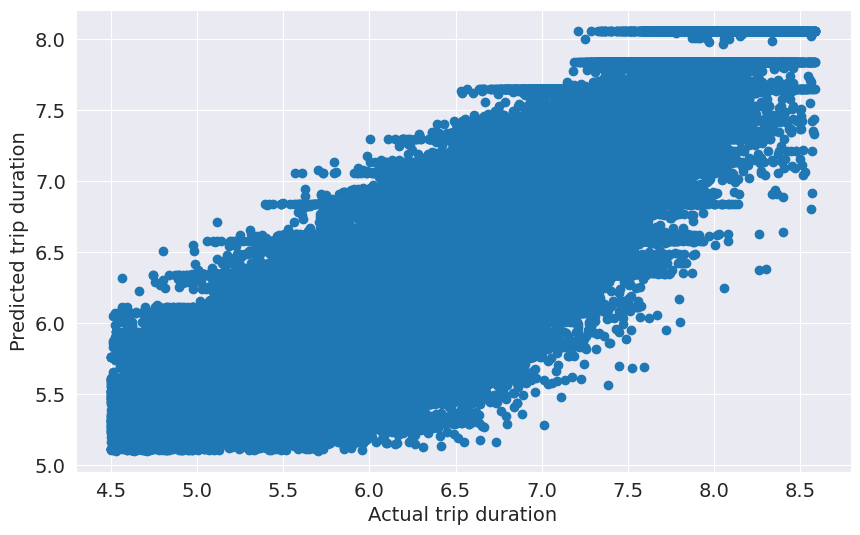

In [99]:
#Scatter plot vs Actual & Predicted trip duration Values
plt.scatter((y_test), (y_pred_rf))
plt.xlabel('Actual trip duration')
plt.ylabel('Predicted trip duration')

Text(0, 0.5, 'residuals')

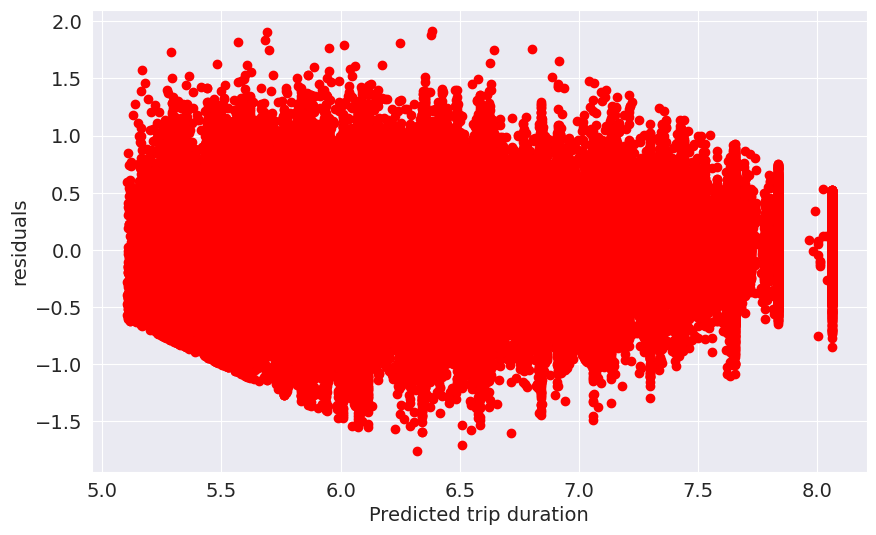

In [100]:
### Heteroscadacity
plt.scatter((y_pred_rf),(y_test)-(y_pred_rf),c='r')
plt.xlabel('Predicted trip duration')
plt.ylabel('residuals')

# **XG Boost and Hyperparameter Tunning**

In [101]:
#importing reqd libraries
import xgboost as xg

In [102]:
xgb = xg.XGBRegressor()

In [103]:
#Setting various parameter for hyperparameter tuning
param_dict_xgb = {
    'max_depth': [4, 6, 7],
 'n_estimators': [60, 80]
  }

In [104]:
#fitting Reandomsearch cv
xgb_random = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict_xgb,
                       cv = 5, verbose=2)

xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .......................max_depth=4, n_estimators=60; total time=   7.5s
[CV] END .......................max_depth=4, n_estimators=60; total time=   5.5s
[CV] END .......................max_depth=4, n_estimators=60; total time=   7.7s
[CV] END .......................max_depth=4, n_estimators=60; total time=   5.8s
[CV] END .......................max_depth=4, n_estimators=60; total time=   7.4s
[CV] END .......................max_depth=4, n_estimators=80; total time=   6.5s
[CV] END .......................max_depth=4, n_estimators=80; total time=   8.2s
[CV] END .......................max_depth=4, n_estimators=80; total time=   6.6s
[CV] END .......................max_depth=4, n_estimators=80; total time=   7.6s
[CV] END .......................max_depth=4, n_estimators=80; total time=   6.0s
[CV] END .......................max_depth=6, n_estimators=60; total time=   8.5s
[CV] END .......................max_depth=6, n_es

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'max_depth': [4, 6, 7],
                                        'n_estimators': [60, 80]},
                   verbose=2)

In [105]:
# print the best parameters after cross validation
xgb_random.best_params_

{'n_estimators': 80, 'max_depth': 7}

In [106]:
#model scores
print('Train neg_mean_squared_error score score : ', xgb_random.best_estimator_.score(X_train,y_train))
print('Test neg_mean_squared_error score score : ', xgb_random.best_estimator_.score(X_test,y_test))

Train neg_mean_squared_error score score :  0.8347418169097335
Test neg_mean_squared_error score score :  0.8298646287042217


In [107]:
#predicted value
y_pred_xg = xgb_random.predict(X_test)

In [108]:
#Evaluating the model using regression metrics
MSE  = round(mean_squared_error((y_test), (y_pred_xg)),2)
print("MSE :" , MSE)

MAE=round(mean_absolute_error((y_test), (y_pred_xg)),2)
print("MAE :" ,MAE)

RMSE = round(np.sqrt(MSE),2)
print("RMSE :" ,RMSE)

r2 = round(r2_score((y_test), (y_pred_xg)),2)
print("R2 :" ,r2)
print("Adjusted R2 : ",round(1-(1-r2_score((y_test), (y_pred_xg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2))

MSE : 0.08
MAE : 0.22
RMSE : 0.28
R2 : 0.83
Adjusted R2 :  0.83


Text(0, 0.5, 'Predicted trip duration')

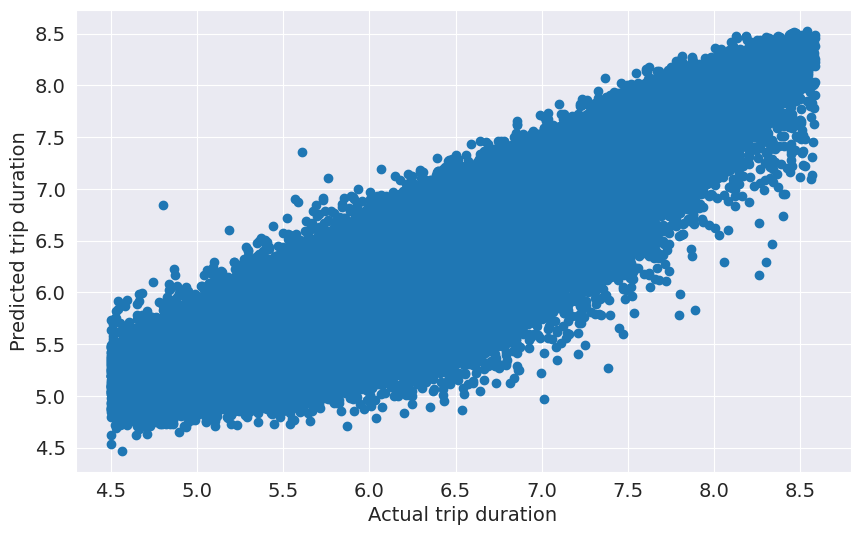

In [109]:
#Scatter plot vs Actual & Predicted trip duration Values
plt.scatter((y_test), (y_pred_xg))
plt.xlabel('Actual trip duration')
plt.ylabel('Predicted trip duration')

Text(0, 0.5, 'residuals')

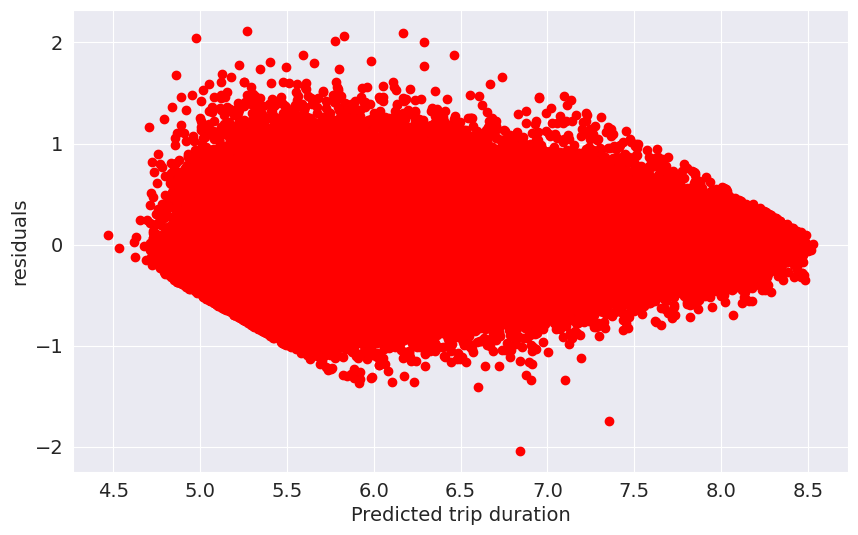

In [110]:
### Heteroscadacity
plt.scatter((y_pred_xg),(y_test)-(y_pred_xg),c='r')
plt.xlabel('Predicted trip duration')
plt.ylabel('residuals')

# **Results**

In [111]:
#creating test results in table format
from prettytable import PrettyTable

test = PrettyTable(['SL NO', 'MODEL_NAME', 'Test MSE', 'Test MAE', 'Test RMSE', 'Test R^2', 'Test Adjusted R^2'])
test.add_row(['1', 'Linear Regression', '0.17', '0.32', '0.41', '0.65', '0.65'])
test.add_row(['2', 'Random Forest Regressor', '0.13', '0.29', '0.36', '0.72', '0.72'])
test.add_row(['3', 'XGBRegressor', '0.08', '0.22', '0.28', '0.83', '0.83'])

print(test)

+-------+-------------------------+----------+----------+-----------+----------+-------------------+
| SL NO |        MODEL_NAME       | Test MSE | Test MAE | Test RMSE | Test R^2 | Test Adjusted R^2 |
+-------+-------------------------+----------+----------+-----------+----------+-------------------+
|   1   |    Linear Regression    |   0.17   |   0.32   |    0.41   |   0.65   |        0.65       |
|   2   | Random Forest Regressor |   0.13   |   0.29   |    0.36   |   0.72   |        0.72       |
|   3   |       XGBRegressor      |   0.08   |   0.22   |    0.28   |   0.83   |        0.83       |
+-------+-------------------------+----------+----------+-----------+----------+-------------------+


# **Conclusion**


During our analysis, we began by preprocessing the data, which involved creating additional columns and cleaning the dataset by removing outliers. Subsequently, we conducted exploratory data analysis (EDA) on all the features in our dataset. This involved both univariate and bivariate analyses on these variables. We studied the numerical variables, calculated their correlations, and examined their relationships with the dependent variable. To address multicollinearity, we utilized Variance Inflation Factor (VIF) analysis. Additionally, we applied One-Hot Encoding by adding dummy columns to handle categorical variables.

We employed three machine learning algorithms: Linear Regression, Random Forest, and XG Boosting. To optimize the performance of our models, we performed hyperparameter tuning. This iterative process aims to fine-tune the parameters of the algorithms to achieve better predictive accuracy and generalization on unseen data.


Some Facts:

*   Our base model, Linear Regression, achieved an R2 score of 0.65 on the test data, serving as our reference for model comparison.

*   The best-performing model was XGBoost, yielding an impressive R2 score of 0.83 on the test data, with an RMSE score of 0.28.

*   Following closely, the RandomForest Regressor attained an R2 score of 0.72 on the test data, with an RMSE score of 0.36. Notably, without proper hyperparameter tuning, RandomForest tends to exhibit overfitting issues and extended runtime, as observed practically.

*   Examining the data, we notice a surge in both trip duration and the number of rides during the evening hours, indicating a natural pattern likely attributed to traffic congestion.

*   Furthermore, there's a notable increase in pickup numbers during the 4-6 pm window, possibly due to the conclusion of office hours.

*   March emerges as the month with the highest taxi ride frequency, possibly owing to salary disbursements toward month-end or vacation periods.

*   Conversely, taxi trips are at their lowest on Mondays and comparatively lower on Sundays, suggesting a preference for staying indoors rather than navigating through traffic, particularly on Sundays.






